<b>Google Colab</b> <a href="https://colab.research.google.com/github/kirillzyusko/deeplearning/blob/master/4/lab.ipynb">link</a>

# **Introduction**

In the beginning of this lab I wanted to complete it using YOLO alghorithm. However, when I read more resources I found proposed neural network architecture, that I should try to use. So I stick with this option.

<div style="align-items: center; justify-content: center">
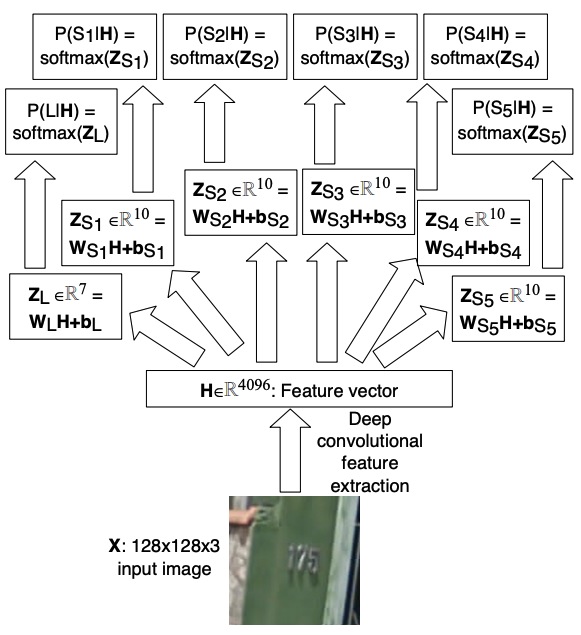</img>
<i style="align-items: center; justify-content: center">Picture 1 - proposed architecture of a neural network</i>
</div>

# **Part 1-1: Download and extract SVNH dataset**

In [0]:
!wget "http://ufldl.stanford.edu/housenumbers/train.tar.gz"
!wget "http://ufldl.stanford.edu/housenumbers/test.tar.gz"
# !wget "http://ufldl.stanford.edu/housenumbers/extra.tar.gz"

--2020-03-17 08:02:32--  http://ufldl.stanford.edu/housenumbers/train.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404141560 (385M) [application/x-gzip]
Saving to: ‘train.tar.gz’

train.tar.gz        100%[===================>] 385.42M  15.2MB/s    in 29s     

2020-03-17 08:03:01 (13.1 MB/s) - ‘train.tar.gz’ saved [404141560/404141560]

--2020-03-17 08:03:03--  http://ufldl.stanford.edu/housenumbers/test.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276555967 (264M) [application/x-gzip]
Saving to: ‘test.tar.gz’

test.tar.gz         100%[===================>] 263.74M  16.3MB/s    in 20s     

2020-03-17 08:03:24 (13.0 MB/s) - ‘test.tar.gz’ saved [276555967/2

Extract .zip

In [0]:
!mkdir train
!mkdir test
#!mkdir extra
!tar xvzf train.tar.gz -C train
!tar xvzf test.tar.gz -C test
#!tar xvzf extra.tar.gz -C extra

In [0]:
%ls

sample_data/  test/  test.tar.gz  train/  train.tar.gz


# **Common const definition:**

In [0]:
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

batch_size=32

In [0]:
MAX_LENGTH = 5
NOT_A_NUMBER = 10

In [0]:
import matplotlib.pyplot as plt

def show_images_with_labels(image_batch,label_batch,batch_size=batch_size):
    plt.figure(figsize=(10,10))
    for n in range(batch_size):
        ax = plt.subplot(4,8,n+1)
        plt.imshow(image_batch[n])
        length=label_batch[0][n]
        title=''.join([str(label_batch[c+1][n]) for c in range(length)])
        plt.title(title)
        plt.axis('off')

# **Part 1-2: Download and extract MNIST dataset**

In [0]:
from keras.datasets import mnist


# the data, split between train and test sets
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

# Normalizing the input
x_train_mnist= x_train_mnist.reshape(x_train_mnist.shape[0], 28, 28, 1) / 255
x_test_mnist = x_test_mnist.reshape(x_test_mnist.shape[0],28,28,1) / 255

Helper function:

In [0]:
import numpy as np
import cv2

def x_to_nn_input(X):
    x = np.reshape(X, (X.shape[0], 28, 28))
    x = np.asarray([cv2.resize(i, (IMAGE_WIDTH,IMAGE_HEIGHT)) for i in x], dtype=np.float32)
    x = np.repeat(x[..., np.newaxis], 3, -1)
    return x

In [0]:
x_to_nn_input(x_train_mnist[0:100]).shape

(100, 64, 64, 3)

Conversion for y value:

In [0]:
def y_mnist_to_NN_architecture_output(y):
  arr = [np.array([]), np.array([]), np.array([]), np.array([]), np.array([]), np.array([])]
  for i in range(6):
      for j in range(y.shape[0]):
          if i == 0:
              arr[0] = np.append(arr[0], int(1))
          if i == 1:
              arr[1] = np.append(arr[1], int(y[j]))
          if i >= 2:
              arr[i] = np.append(arr[i], int(NOT_A_NUMBER))
  return [i.astype(int) for i in arr]

In [0]:
y_mnist_to_NN_architecture_output(y_train_mnist)[0:32]

[array([1, 1, 1, ..., 1, 1, 1]),
 array([5, 0, 4, ..., 5, 6, 8]),
 array([10, 10, 10, ..., 10, 10, 10]),
 array([10, 10, 10, ..., 10, 10, 10]),
 array([10, 10, 10, ..., 10, 10, 10]),
 array([10, 10, 10, ..., 10, 10, 10])]

# **Part 1-3: Build a NN model**

NN model

In [0]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

input=Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), name="input")

H=Conv2D(16,(5,5),activation='relu',padding='same')(input)
H=BatchNormalization()(H)
H=MaxPooling2D(padding='same')(H)
H=Dropout(0.25)(H)

H=Conv2D(32,(5,5),activation='relu',padding='same')(H)
H=BatchNormalization()(H)
H=MaxPooling2D(padding='same',strides=1)(H)
H=Dropout(0.25)(H)

H=Conv2D(48,(5,5),activation='relu',padding='same')(H)
H=BatchNormalization()(H)
H=MaxPooling2D(padding='same')(H)
H=Dropout(0.25)(H)

H=Conv2D(64,(5,5),activation='relu',padding='same')(H)
H=BatchNormalization()(H)
H=MaxPooling2D(padding='same',strides=1)(H)
H=Dropout(0.25)(H)

H=Conv2D(128,(5,5),activation='relu',padding='same')(H)
H=BatchNormalization()(H)
H=MaxPooling2D(padding='same')(H)
H=Dropout(0.25)(H)

H=Conv2D(16,(5,5),activation='relu',padding='same')(H)
H=BatchNormalization()(H)
H=MaxPooling2D(padding='same',strides=1)(H)
H=Dropout(0.25)(H)

H=Conv2D(16,(5,5),activation='relu',padding='same')(H)
H=BatchNormalization()(H)
H=MaxPooling2D(padding='same')(H)
H=Dropout(0.25)(H)

H=Conv2D(16,(5,5),activation='relu',padding='same')(H)
H=BatchNormalization()(H)
H=MaxPooling2D(padding='same',strides=1)(H)
H=Dropout(0.25)(H)

H=Flatten()(H)      
hidden10=Dense(4096, activation='relu')(H)
#H=Dropout(0.25)(H)
#hidden10=Dense(4096, activation='relu')(H)
#hidden10=Dropout(0.25)(H)

length=Dense(6, activation='softmax', name='length')(hidden10)
digit1=Dense(11, activation='softmax', name='digit1')(hidden10)
digit2=Dense(11, activation='softmax', name='digit2')(hidden10)
digit3=Dense(11, activation='softmax', name='digit3')(hidden10)
digit4=Dense(11, activation='softmax', name='digit4')(hidden10)
digit5=Dense(11, activation='softmax', name='digit5')(hidden10)

model = Model(inputs=input, outputs=[length,digit1,digit2,digit3,digit4,digit5], name='svhn_model')

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc'])

model.summary()

Model: "svhn_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_68 (Conv2D)              (None, 64, 64, 16)   1216        input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_68 (BatchNo (None, 64, 64, 16)   64          conv2d_68[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_68 (MaxPooling2D) (None, 32, 32, 16)   0           batch_normalization_68[0][0]     
_________________________________________________________________________________________

# **Part 1: Train on mnist dataset**

Show resized images:

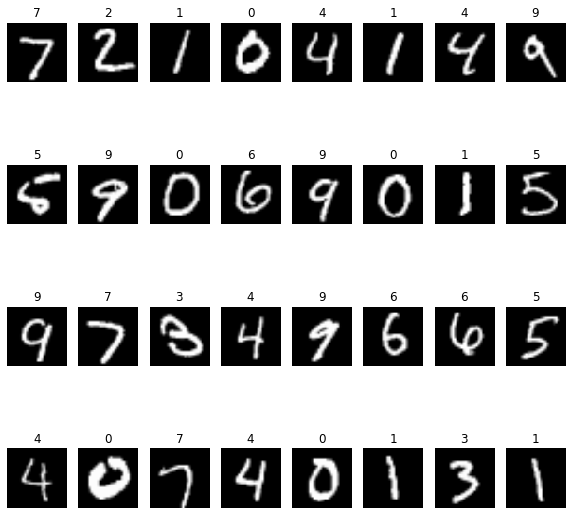

In [0]:
show_images_with_labels(x_to_nn_input(x_test_mnist[0:32])[0:32], y_mnist_to_NN_architecture_output(y_test_mnist)[0:32])

NN train

In [0]:
X = x_to_nn_input(x_train_mnist[0:5000])
y = y_mnist_to_NN_architecture_output(y_train_mnist[0:5000])
Xt = x_to_nn_input(x_train_mnist[0:1000])
yt = y_mnist_to_NN_architecture_output(y_train_mnist[0:1000])

history = model.fit(
    X,
    y,
    validation_data=(Xt, yt),
    epochs=5,
    verbose=2
)

Train on 5000 samples, validate on 1000 samples
Epoch 1/5
5000/5000 - 5s - loss: 0.9422 - length_loss: 0.0076 - digit1_loss: 0.8515 - digit2_loss: 0.0233 - digit3_loss: 0.0201 - digit4_loss: 0.0194 - digit5_loss: 0.0172 - length_acc: 0.9984 - digit1_acc: 0.7152 - digit2_acc: 0.9936 - digit3_acc: 0.9936 - digit4_acc: 0.9936 - digit5_acc: 0.9936 - val_loss: 11.2706 - val_length_loss: 0.0000e+00 - val_digit1_loss: 11.2893 - val_digit2_loss: 0.0000e+00 - val_digit3_loss: 0.0000e+00 - val_digit4_loss: 0.0000e+00 - val_digit5_loss: 1.1642e-10 - val_length_acc: 1.0000 - val_digit1_acc: 0.1160 - val_digit2_acc: 1.0000 - val_digit3_acc: 1.0000 - val_digit4_acc: 1.0000 - val_digit5_acc: 1.0000
Epoch 2/5
5000/5000 - 3s - loss: 0.2852 - length_loss: 9.0512e-05 - digit1_loss: 0.2942 - digit2_loss: 1.5900e-04 - digit3_loss: 1.6231e-04 - digit4_loss: 1.6031e-04 - digit5_loss: 1.8237e-04 - length_acc: 1.0000 - digit1_acc: 0.9118 - digit2_acc: 1.0000 - digit3_acc: 1.0000 - digit4_acc: 1.0000 - digit5_a

# **PART 2.1: dataset preparation**

Dataset preprocessing:

In [0]:
import h5py
import pandas as pd
import numpy as np

# The DigitStructFile is just a wrapper around the h5py data. It basically references 
#    inf:              The input h5 matlab file
#    digitStructName   The h5 ref to all the file names
#    digitStructBbox   The h5 ref to all struct data
class DigitStructFile:
    def __init__(self, inf):
        self.inf = h5py.File(inf, 'r')
        self.digitStructName = self.inf['digitStruct']['name']
        self.digitStructBbox = self.inf['digitStruct']['bbox']

    # getName returns the 'name' string for for the n(th) digitStruct. 
    def getName(self, n):
        return ''.join([chr(c[0]) for c in self.inf[self.digitStructName[n][0]].value])

    # bboxHelper handles the coding difference when there is exactly one bbox or an array of bbox. 
    def bboxHelper(self, attr):
        if (len(attr) > 1):
            attr = [self.inf[attr.value[j].item()].value[0][0] for j in range(len(attr))]
        else:
            attr = [attr.value[0][0]]
        return attr

    # Return a restructured version of the dataset.
    #
    #   Return a list of such dicts:
    #      'filename': filename of the samples
    #      'labels': list of such digits presented by an 6-array
    #
    # Note: We may turn this to a generator, if memory issues arise.
    def getAllDigitStructure(self):
        labels = []
        filenames=[]

        for i in range(len(self.digitStructBbox)):
            bbox = self.digitStructBbox[i].item()
            label_attribute = self.inf[bbox]['label']
            label = self.bboxHelper(label_attribute)
            # since one of the numbers has 6 numbers! (it is > 5)
            label = [0 if digit == 10 else digit for digit in label]
            length = len(label)
            name = self.getName(i)

            if (length > MAX_LENGTH):
                continue

            for _ in range(MAX_LENGTH - length):
                label.append(NOT_A_NUMBER)
            label.append(length)

            labels.append(label)
            filenames.append(name)

        return np.array(filenames), np.array(labels).astype(int)

    def to_dataframe(self):
        filenames, labels = self.getAllDigitStructure()

        return pd.DataFrame({
          'filename': filenames,
          'length': labels[:,5],
          'digit1': labels[:,0],
          'digit2': labels[:,1],
          'digit3': labels[:,2],
          'digit4': labels[:,3],
          'digit5': labels[:,4]
      })


df = DigitStructFile('train/train/digitStruct.mat').to_dataframe()

df.tail()

filename  length  digit1  digit2  digit3  digit4  digit5
33396  33398.png       1       8      10      10      10      10
33397  33399.png       1       8      10      10      10      10
33398  33400.png       2       9       5      10      10      10
33399  33401.png       2       2       2      10      10      10
33400  33402.png       3       1       6       9      10      10

And the same pre-processing to test set:

In [0]:
df_test = DigitStructFile('test/test/digitStruct.mat').to_dataframe()

df_test.tail()

filename  length  digit1  digit2  digit3  digit4  digit5
13063  13064.png       2       1       0      10      10      10
13064  13065.png       2       1       7      10      10      10
13065  13066.png       3       1       3       6      10      10
13066  13067.png       3       2       2       7      10      10
13067  13068.png       2       6       7      10      10      10

# **PART 2.2: problem and solution: new crop alghoritm**

In [0]:
import os
import cv2
import h5py
import math
import numpy as np
from PIL import Image
from scipy import misc
import random as rand
from operator import add
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches
import pickle as pickle

In [0]:
training_directory = "train/train/"
training_filenames = []
# Note that training_filenames is 0-indexed, but that there is no 0.png
# so, x.png = training_filenames[x-1]
for i in range(1, 33403):
    training_filenames.append(str(i)+'.png')

testing_directory = "test/test/"
testing_filenames = []
# Note that testing_filenames is 0-indexed, but that there is no 0.png
# so, x.png = testing_filenames[x-1]
for i in range(1, 13069):
    testing_filenames.append(str(i)+'.png')

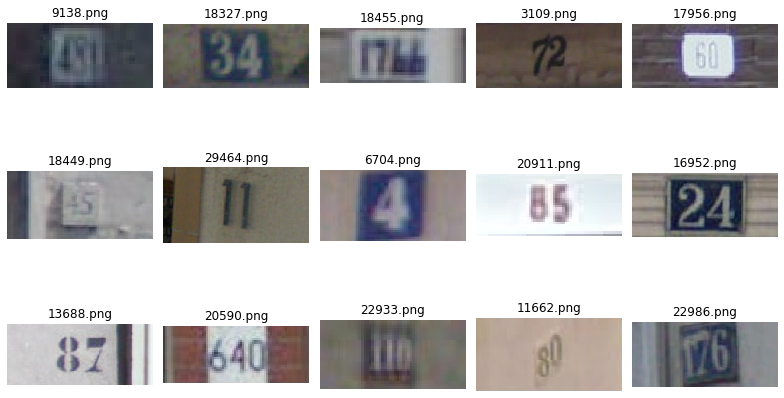

In [0]:
fig = plt.figure(figsize=(11, 7))
i = 1
rows = 3
columns = 5
for c in np.random.choice(len(training_filenames), rows * columns):
    img = mpimg.imread(training_directory + training_filenames[c])
    fig.add_subplot(rows, columns, i)
    i += 1
    plt.title(training_filenames[c])
    plt.axis("off")
    plt.imshow(img)
plt.tight_layout()
plt.show()

In [0]:
def read_metadata(train=True):
    if train:
        directory = training_directory
        fn = "train_metadata.pickle"
    else:
        directory = testing_directory
        fn = "test_metadata.pickle"
    
    # Load the given MatLab file
    f = h5py.File(directory + 'digitStruct.mat', 'r') 
    
    # Create our empty dictionary
    metadata= {}
    metadata['height'] = []
    metadata['label'] = []
    metadata['left'] = []
    metadata['top'] = []
    metadata['width'] = []
    
    # define a function to pass to h5py's visititems() function
    def print_attrs(name, obj):
        vals = []
        if obj.shape[0] == 1:
            vals.append(obj[0][0])
        else:
            for k in range(obj.shape[0]):
                vals.append(f[obj[k][0]][0][0])
        metadata[name].append(vals)
    
    # Add information to metadata
    for item in f['/digitStruct/bbox']:
        f[item[0]].visititems(print_attrs)

    return metadata

In [0]:
training_metadata = read_metadata(train=True)
testing_metadata = read_metadata(train=False)

In [0]:
train_l = training_metadata['label']
test_l = testing_metadata['label']

Problem:

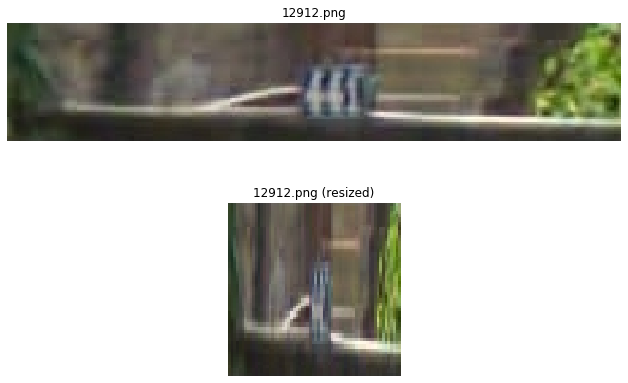

In [0]:
fig = plt.figure(figsize=(11, 7))
i = 12912

fig.add_subplot(211)
plt.axis("off")
plt.title(str(i) + ".png")
img = mpimg.imread(training_directory + training_filenames[i-1])
plt.imshow(img)

fig.add_subplot(212)
plt.axis("off")
img = Image.open(training_directory + training_filenames[i-1]).resize(IMAGE_SIZE)
plt.title(str(i) + ".png (resized)")
plt.imshow(img)
plt.show()

In [0]:
def getBBox(i, train=True):
    '''
    Given i, the desired i.png, returns
    x_min, y_min, x_max, y_max,
    the four numbers which define the small rectangular bounding
    box that contains all individual character bounding boxes
    '''
    if train:
        metadata = training_metadata
    else:
        metadata = testing_metadata
    
    x_min = min(metadata['left'][i-1])
    y_min = min(metadata['top'][i-1])
    x_max = max(map(add, metadata['left'][i-1], metadata['width'][i-1]))
    y_max = max(map(add, metadata['top'][i-1], metadata['height'][i-1]))
    return x_min, y_min, x_max, y_max

In [0]:
def cropBBox(img, x_min, y_min, x_max, y_max):
    '''
    Given a numpy array representing an image, and
    the four boundaries of the bounding box, returns
    the cropped bounding box, as
    x_min, y_min, x_max, y_max
    '''
    x_min = max(0, x_min)
    y_min = max(0, y_min)
    x_max = min(img.size[1], x_max)
    y_max = min(img.size[0], y_max)
    return x_min, y_min, x_max, y_max

In [0]:
def expandBBox(x_min, y_min, x_max, y_max):
    '''
    Given the four boundaries of the bounding box, returns
    those boundaries expanded out from the centroid by 30%, as
    x_min, y_min, x_max, y_max
    '''
    # The delta will be 30% of the width or height, (integer) halved
    x_d = ((x_max - x_min) * 0.3) // 2
    y_d = ((y_max - y_min) * 0.3) // 2
    return x_min - x_d, y_min - y_d, x_max + x_d, y_max + y_d

In [0]:
def getResized(f, train=True):
    '''
    Given an open file f, representing the desired image file,
    and a boolean representing whether this is a training image
    or a testing image,
    returns a numpy array, which is the portion of the
    image enclosed by the bounding box around all digits,
    resized to:
    64 pixels by 64 pixels if train=True,
    54 pixels by 54 pixels if train=False
    '''
    # Read the file as a numpy array
    img = Image.open(f)
    
    i = int(f.split('/')[2].split('.')[0])

    x_min, y_min, x_max, y_max = getBBox(i, train)
    cropped_img = img.crop((x_min, y_min, x_max, y_max)).resize(IMAGE_SIZE)
    cropped_img.save('processed/' + f)
    # Return the cropped, resized numpy array
    return cropped_img

In [0]:
!mkdir -p processed/train/train

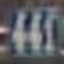

In [0]:
getResized('train/train/12912.png')

In [0]:
for i in df['filename'].items():
    getResized('train/train/' + i[1])

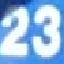

In [0]:
Image.open('processed/train/train/2.png')

In [0]:
!mkdir -p processed/test/test

In [0]:
for i in df_test['filename'].items():
    getResized('test/test/' + i[1], train=False)

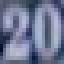

In [0]:
Image.open('processed/test/test/12.png')

# **Part 2.2: Train on svnh dataset**

Dataset split

In [0]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.10)

Image generator:

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# use data augmentation
train_datagen_aug = ImageDataGenerator(
      rotation_range=10,
      rescale=1./255,
      shear_range=0.1,
      zoom_range=0.1,
      width_shift_range=0.1,
      height_shift_range=0.1
)

test_gen = ImageDataGenerator(rescale=1./255)

Using TensorFlow backend.


Data flows:

In [0]:
TRAIN_PATH = 'processed/train/train'
TEST_PATH = 'processed/test/test'

y_col = ['length', 'digit1', 'digit2', 'digit3', 'digit4', 'digit5']
total_train = train.shape[0]
total_validate = val.shape[0]
batch_size = 32  # since Andrew Ng told, that better use 2^n

train_generator = train_datagen_aug.flow_from_dataframe(
    train, 
    TRAIN_PATH, 
    x_col='filename',
    y_col=y_col,
    target_size=IMAGE_SIZE,
    class_mode='multi_output',
    batch_size=batch_size
)

val_generator = test_gen.flow_from_dataframe(
    val, 
    TRAIN_PATH, 
    x_col='filename',
    y_col=y_col,
    target_size=IMAGE_SIZE,
    class_mode='multi_output',
    batch_size=batch_size
)

Found 30060 validated image filenames.
Found 3341 validated image filenames.


Show these examples:

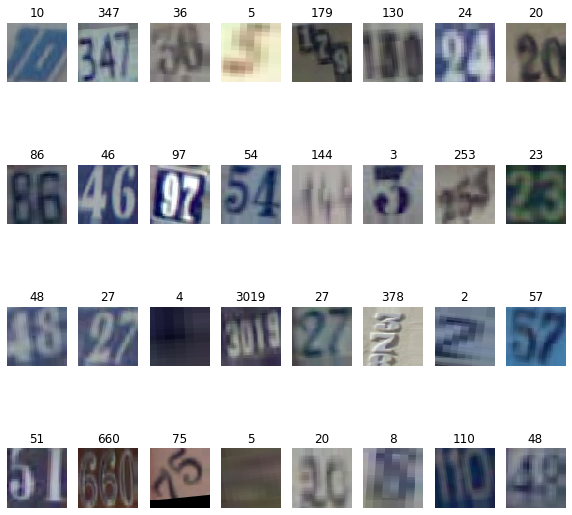

In [0]:
image_batch, label_batch = next(train_generator)
show_images_with_labels(image_batch, label_batch)

Download **model.h5** file:

In [0]:
!rm model.h5

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%ls 

drive/  extra.tar.gz  test/        train/
extra/  sample_data/  test.tar.gz  train.tar.gz


In [0]:
from tensorflow.keras.models import load_model

model = load_model("drive/My Drive/model-new-processing-best-val-after-60.h5")

OSError: ignored

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

# define the checkpoint
filepath = "model-80.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history = model.fit_generator(
    train_generator, 
    epochs=20,
    validation_data=val_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks_list
)

Epoch 1/20
102/939 [==>...........................] - ETA: 30s - loss: 0.5077 - length_loss: 0.0578 - digit1_loss: 0.1485 - digit2_loss: 0.1658 - digit3_loss: 0.0993 - digit4_loss: 0.0359 - digit5_loss: 3.7204e-04 - length_acc: 0.9804 - digit1_acc: 0.9559 - digit2_acc: 0.9534 - digit3_acc: 0.9715 - digit4_acc: 0.9920 - digit5_acc: 1.0000
Epoch 00001: val_loss improved from inf to 0.51516, saving model to model-80.h5
939/939 [==============================] - 77s 82ms/step - loss: 0.9272 - length_loss: 0.1028 - digit1_loss: 0.2808 - digit2_loss: 0.2937 - digit3_loss: 0.1918 - digit4_loss: 0.0565 - digit5_loss: 0.0017 - length_acc: 0.9667 - digit1_acc: 0.9153 - digit2_acc: 0.9130 - digit3_acc: 0.9434 - digit4_acc: 0.9839 - digit5_acc: 0.9998 - val_loss: 0.5152 - val_length_loss: 0.0583 - val_digit1_loss: 0.1495 - val_digit2_loss: 0.1673 - val_digit3_loss: 0.1017 - val_digit4_loss: 0.0381 - val_digit5_loss: 3.7175e-04 - val_length_acc: 0.9802 - val_digit1_acc: 0.9555 - val_digit2_acc: 0.9

Data image flow source for test set:

In [0]:
test_generator = test_gen.flow_from_dataframe(
    df_test, 
    TEST_PATH, 
    x_col='filename',
    y_col=y_col,
    target_size=IMAGE_SIZE,
    class_mode='multi_output',
    batch_size=batch_size
)

Found 13068 validated image filenames.


In [0]:
from tensorflow.keras.models import load_model

model2 = model
model = load_model("model-80.h5")

In [0]:
results = model.evaluate(test_generator)

409/409 [==============================] - 10s 25ms/step - loss: 0.5721 - length_loss: 0.0804 - digit1_loss: 0.1829 - digit2_loss: 0.2030 - digit3_loss: 0.0893 - digit4_loss: 0.0133 - digit5_loss: 0.0033 - length_acc: 0.9753 - digit1_acc: 0.9488 - digit2_acc: 0.9453 - digit3_acc: 0.9757 - digit4_acc: 0.9963 - digit5_acc: 0.9998


In [0]:
print('Len acc: ', results[7])
print('Dig1 acc: ', results[8])
print('Dig2 acc: ', results[9])
print('Dig3 acc: ', results[10])
print('Dig4 acc: ', results[11])
print('Dig5 acc: ', results[12])

Len acc:  0.97528315
Dig1 acc:  0.9488062
Dig2 acc:  0.9452862
Dig3 acc:  0.97566575
Dig4 acc:  0.9962504
Dig5 acc:  0.99984694


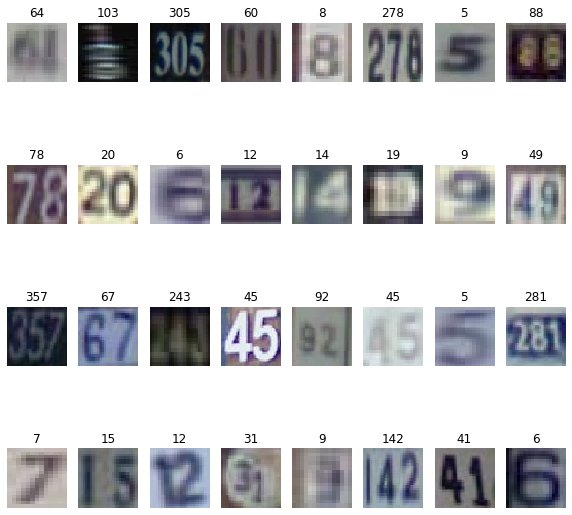

In [0]:
image_batch, label_batch = next(test_generator)

predict=model.predict(image_batch)

predicted_length=np.argmax(predict[0], axis=-1)
predicted_digit1=np.argmax(predict[1], axis=-1)
predicted_digit2=np.argmax(predict[2], axis=-1)
predicted_digit3=np.argmax(predict[3], axis=-1)
predicted_digit4=np.argmax(predict[4], axis=-1)
predicted_digit5=np.argmax(predict[5], axis=-1)

predicted_label=[predicted_length,predicted_digit1,predicted_digit2,predicted_digit3,predicted_digit4,predicted_digit5]

show_images_with_labels(image_batch, predicted_label)

# **Part 3: Test on own images**

Check on google images:

[array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        7.456558e-23, 0.000000e+00]], dtype=float32), array([[0.0000000e+00, 1.6358775e-16, 1.3107771e-34, 1.1103282e-31,
        8.4049134e-19, 1.9624716e-17, 1.0000000e+00, 7.2291348e-14,
        2.4033866e-26, 5.4348541e-23, 0.0000000e+00]], dtype=float32), array([[3.9607071e-06, 2.5994729e-02, 1.6505202e-29, 1.3241317e-30,
        0.0000000e+00, 1.2967188e-30, 1.4330922e-02, 1.1229643e-33,
        9.5967036e-01, 4.3593849e-30, 0.0000000e+00]], dtype=float32), array([[9.9999964e-01, 3.3747841e-07, 2.1843044e-26, 2.9931623e-26,
        1.6250087e-19, 0.0000000e+00, 3.1781330e-18, 1.0030542e-11,
        2.1703219e-22, 9.0596929e-28, 8.6447269e-34]], dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)]
[array([3]), array([6]), array([8]), array([0]), array([10]), array([10])]
[array([[0.0000000e+00, 7.8839387e-28, 3.5453

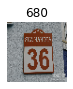

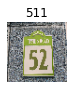

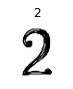

In [0]:
import cv2
import numpy as np
import requests

def predict_by_URL(url):
    resp = requests.get(url, stream=True).raw
    image = np.asarray(bytearray(resp.read()), dtype="uint8")

    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (IMAGE_WIDTH,IMAGE_HEIGHT))

    predict=model.predict(np.array([image]))
    print(predict)
    predicted_length=np.argmax(predict[0], axis=-1)
    predicted_digit1=np.argmax(predict[1], axis=-1)
    predicted_digit2=np.argmax(predict[2], axis=-1)
    predicted_digit3=np.argmax(predict[3], axis=-1)
    predicted_digit4=np.argmax(predict[4], axis=-1)
    predicted_digit5=np.argmax(predict[5], axis=-1)

    predicted_label=[predicted_length,predicted_digit1,predicted_digit2,predicted_digit3,predicted_digit4,predicted_digit5]
    print(predicted_label)

    show_images_with_labels(np.array([image]), predicted_label, 1)

predict_by_URL('https://realt.by/uploads/tx_uedbhouses/Belarus/5102/1301116904/36/eed358d58c54a818.jpg')
predict_by_URL('https://realt.by/uploads/tx_uedbhouses/Belarus/5102/1205/52/ee87296a4baa3f83.jpg')
predict_by_URL('https://data.ac-illust.com/data/thumbnails/63/63661cf7a3df52dce5e2c8d0419c20e5_t.jpeg')

Mobile result:

In [0]:
tensor = np.array([209, 54, 36, 209, 54, 36, 215, 52, 35, 216, 53, 36, 214, 51, 34, 215, 52, 35, 216, 53, 36, 217, 54, 37, 215, 55, 31, 213, 53, 29, 212, 52, 30, 213, 53, 31, 214, 51, 32, 217, 54, 35, 212, 52, 32, 215, 55, 35, 214, 51, 30, 212, 49, 28, 215, 51, 30, 213, 49, 28, 214, 51, 30, 213, 50, 29, 214, 49, 31, 214, 49, 31, 213, 50, 31, 213, 50, 31, 212, 51, 35, 211, 50, 34, 210, 51, 33, 210, 51, 33, 209, 48, 31, 210, 49, 32, 213, 50, 33, 213, 50, 33, 210, 47, 28, 210, 47, 28, 209, 44, 26, 211, 46, 28, 209, 45, 32, 209, 45, 32, 207, 44, 27, 210, 47, 30, 210, 46, 33, 207, 43, 30, 208, 43, 28, 209, 44, 29, 208, 45, 28, 207, 44, 27, 206, 48, 31, 206, 48, 31, 203, 46, 27, 207, 50, 31, 206, 47, 30, 207, 48, 31, 208, 50, 33, 206, 48, 31, 208, 49, 31, 211, 52, 34, 211, 53, 36, 210, 52, 35, 210, 52, 39, 210, 52, 39, 204, 56, 42, 204, 56, 42, 209, 54, 36, 209, 54, 36, 214, 51, 34, 215, 52, 35, 214, 51, 34, 216, 53, 36, 215, 52, 35, 215, 52, 35, 213, 53, 29, 215, 55, 31, 212, 52, 30, 213, 53, 31, 214, 51, 32, 214, 51, 32, 213, 53, 33, 214, 54, 34, 214, 51, 30, 211, 48, 27, 213, 49, 28, 215, 51, 30, 212, 49, 28, 215, 52, 31, 213, 48, 30, 214, 49, 31, 212, 49, 30, 212, 49, 30, 210, 49, 33, 209, 48, 32, 210, 51, 33, 208, 49, 31, 211, 50, 33, 208, 47, 30, 210, 47, 30, 212, 49, 32, 209, 46, 27, 211, 48, 29, 209, 44, 26, 211, 46, 28, 209, 45, 32, 208, 44, 31, 208, 45, 28, 210, 47, 30, 209, 45, 32, 208, 44, 31, 210, 45, 30, 210, 45, 30, 208, 45, 28, 208, 45, 28, 206, 48, 31, 207, 49, 32, 205, 48, 29, 206, 49, 30, 209, 50, 33, 207, 48, 31, 207, 49, 32, 207, 49, 32, 210, 51, 33, 207, 48, 30, 208, 50, 33, 210, 52, 35, 210, 52, 39, 211, 53, 40, 205, 57, 43, 204, 56, 42, 208, 53, 35, 208, 53, 35, 214, 53, 37, 211, 50, 34, 214, 51, 32, 215, 52, 33, 213, 50, 33, 214, 51, 34, 213, 53, 31, 212, 52, 30, 215, 52, 33, 214, 51, 32, 215, 52, 31, 216, 53, 32, 212, 51, 34, 214, 53, 36, 216, 53, 34, 214, 51, 32, 210, 50, 30, 209, 49, 29, 211, 46, 28, 209, 44, 26, 209, 46, 29, 208, 45, 28, 206, 45, 28, 209, 48, 31, 205, 46, 28, 206, 47, 29, 209, 50, 32, 210, 51, 33, 210, 53, 34, 208, 51, 32, 207, 48, 31, 207, 48, 31, 210, 47, 30, 210, 47, 30, 207, 48, 30, 205, 46, 28, 209, 45, 30, 208, 44, 29, 208, 45, 28, 208, 45, 28, 209, 46, 29, 210, 47, 30, 208, 45, 28, 209, 46, 29, 211, 46, 30, 211, 46, 30, 206, 49, 30, 206, 49, 30, 207, 48, 31, 206, 47, 30, 203, 45, 28, 206, 48, 31, 209, 50, 32, 210, 51, 33, 211, 52, 34, 210, 51, 33, 213, 54, 37, 212, 53, 36, 211, 51, 39, 212, 52, 40, 205, 55, 42, 205, 55, 42, 208, 53, 35, 208, 53, 35, 213, 52, 36, 213, 52, 36, 217, 54, 35, 214, 51, 32, 216, 53, 36, 214, 51, 34, 213, 53, 31, 213, 53, 31, 214, 51, 32, 215, 52, 33, 215, 52, 31, 214, 51, 30, 213, 52, 35, 214, 53, 36, 211, 48, 29, 212, 49, 30, 208, 48, 28, 207, 47, 27, 210, 45, 27, 210, 45, 27, 208, 45, 28, 207, 44, 27, 207, 46, 29, 207, 46, 29, 208, 49, 31, 208, 49, 31, 207, 48, 30, 207, 48, 30, 207, 50, 31, 204, 47, 28, 207, 48, 31, 206, 47, 30, 210, 47, 30, 209, 46, 29, 205, 46, 28, 208, 49, 31, 209, 45, 30, 210, 46, 31, 209, 46, 29, 209, 46, 29, 209, 46, 29, 210, 47, 30, 210, 47, 30, 212, 49, 32, 210, 45, 29, 213, 48, 32, 207, 50, 31, 209, 52, 33, 209, 50, 33, 208, 49, 32, 204, 46, 29, 206, 48, 31, 207, 48, 30, 206, 47, 29, 210, 51, 33, 213, 54, 36, 211, 52, 35, 212, 53, 36, 211, 51, 39, 212, 52, 40, 204, 54, 41, 203, 53, 40, 212, 54, 37, 211, 53, 36, 212, 52, 38, 211, 51, 37, 215, 52, 33, 217, 54, 35, 214, 51, 32, 213, 50, 31, 212, 52, 32, 212, 52, 32, 217, 54, 35, 214, 51, 32, 215, 52, 31, 214, 51, 30, 215, 51, 36, 215, 51, 36, 215, 52, 33, 214, 51, 32, 210, 47, 28, 209, 46, 27, 207, 47, 27, 207, 47, 27, 206, 45, 29, 204, 43, 27, 206, 47, 29, 205, 46, 28, 208, 50, 33, 206, 48, 31, 208, 49, 31, 207, 48, 30, 206, 51, 35, 204, 49, 33, 208, 47, 31, 208, 47, 31, 207, 49, 32, 206, 48, 31, 206, 47, 29, 204, 45, 27, 203, 48, 32, 203, 48, 32, 207, 49, 32, 208, 50, 33, 205, 47, 30, 207, 49, 32, 211, 50, 34, 209, 48, 32, 209, 48, 31, 211, 50, 33, 210, 51, 33, 208, 49, 31, 208, 50, 35, 207, 49, 34, 209, 50, 33, 207, 48, 31, 206, 48, 31, 206, 48, 31, 211, 52, 34, 213, 54, 36, 212, 51, 35, 211, 50, 34, 210, 52, 35, 209, 51, 34, 203, 55, 39, 204, 56, 40, 212, 54, 37, 211, 53, 36, 212, 52, 38, 212, 52, 38, 215, 52, 33, 215, 52, 33, 216, 53, 34, 215, 52, 33, 211, 51, 31, 213, 53, 33, 214, 51, 32, 215, 52, 33, 215, 52, 31, 213, 50, 29, 214, 50, 35, 215, 51, 36, 214, 51, 32, 213, 50, 31, 212, 49, 30, 209, 46, 27, 206, 46, 26, 207, 47, 27, 206, 45, 29, 209, 48, 32, 206, 47, 29, 207, 48, 30, 206, 48, 31, 207, 49, 32, 207, 48, 30, 208, 49, 31, 202, 47, 31, 206, 51, 35, 208, 47, 31, 206, 45, 29, 209, 51, 34, 206, 48, 31, 207, 48, 30, 206, 47, 29, 205, 50, 34, 206, 51, 35, 209, 51, 34, 208, 50, 33, 207, 49, 32, 209, 51, 34, 211, 50, 34, 211, 50, 34, 211, 50, 33, 211, 50, 33, 210, 51, 33, 210, 51, 33, 206, 48, 33, 207, 49, 34, 209, 50, 33, 207, 48, 31, 207, 49, 32, 205, 47, 30, 208, 49, 31, 210, 51, 33, 210, 49, 33, 212, 51, 35, 210, 52, 35, 209, 51, 34, 203, 55, 39, 202, 54, 38, 211, 53, 36, 210, 52, 35, 212, 53, 36, 210, 51, 34, 215, 52, 35, 214, 51, 34, 212, 52, 32, 212, 52, 32, 217, 54, 35, 215, 52, 33, 216, 51, 33, 215, 50, 32, 214, 51, 30, 214, 51, 30, 213, 50, 31, 214, 51, 32, 215, 50, 32, 214, 49, 31, 214, 51, 32, 214, 51, 32, 210, 50, 30, 207, 47, 27, 207, 48, 30, 205, 46, 28, 208, 47, 30, 208, 47, 30, 205, 47, 30, 206, 48, 31, 205, 47, 32, 206, 48, 33, 205, 51, 35, 203, 49, 33, 204, 50, 34, 204, 50, 34, 203, 48, 32, 206, 51, 35, 202, 48, 36, 207, 53, 41, 207, 49, 34, 208, 50, 35, 204, 53, 38, 206, 55, 40, 207, 52, 36, 208, 53, 37, 207, 52, 34, 206, 51, 33, 208, 53, 35, 208, 53, 35, 209, 52, 33, 208, 51, 32, 209, 51, 34, 208, 50, 33, 210, 51, 34, 208, 49, 32, 206, 48, 31, 207, 49, 32, 204, 46, 31, 208, 50, 35, 210, 50, 36, 212, 52, 38, 210, 52, 35, 207, 49, 32, 202, 52, 39, 202, 52, 39, 210, 52, 35, 209, 51, 34, 211, 52, 35, 211, 52, 35, 215, 52, 35, 213, 50, 33, 211, 51, 31, 213, 53, 33, 213, 50, 31, 212, 49, 30, 216, 51, 33, 214, 49, 31, 214, 51, 30, 213, 50, 29, 214, 51, 32, 214, 51, 32, 215, 50, 32, 214, 49, 31, 214, 51, 32, 215, 52, 33, 211, 51, 31, 209, 49, 29, 208, 49, 31, 208, 49, 31, 209, 48, 31, 209, 48, 31, 205, 47, 30, 206, 48, 31, 208, 50, 35, 206, 48, 33, 204, 50, 34, 205, 51, 35, 204, 50, 34, 206, 52, 36, 207, 52, 36, 205, 50, 34, 206, 52, 40, 205, 51, 39, 210, 52, 37, 210, 52, 37, 206, 55, 40, 205, 54, 39, 209, 54, 38, 209, 54, 38, 208, 53, 35, 207, 52, 34, 208, 53, 35, 210, 55, 37, 210, 53, 34, 210, 53, 34, 211, 53, 36, 208, 50, 33, 211, 52, 35, 208, 49, 32, 208, 50, 33, 207, 49, 32, 206, 48, 33, 207, 49, 34, 211, 51, 37, 210, 50, 36, 209, 51, 34, 209, 51, 34, 201, 51, 38, 200, 50, 37, 210, 52, 35, 209, 51, 34, 213, 54, 36, 212, 53, 35, 214, 51, 34, 215, 52, 35, 212, 52, 32, 213, 53, 33, 215, 52, 31, 213, 50, 29, 214, 50, 29, 216, 52, 31, 213, 50, 29, 213, 50, 29, 214, 51, 30, 213, 50, 29, 215, 50, 32, 214, 49, 31, 213, 50, 31, 215, 52, 33, 212, 51, 34, 211, 50, 33, 208, 49, 29, 209, 50, 30, 201, 46, 27, 202, 47, 28, 205, 47, 30, 207, 49, 32, 207, 49, 32, 205, 47, 30, 201, 50, 35, 203, 52, 37, 194, 50, 35, 197, 53, 38, 191, 58, 41, 194, 61, 44, 184, 63, 48, 185, 64, 49, 183, 65, 51, 182, 64, 50, 193, 63, 49, 191, 61, 47, 195, 55, 41, 194, 54, 40, 198, 50, 36, 195, 47, 33, 198, 47, 30, 197, 46, 29, 210, 52, 37, 209, 51, 36, 211, 52, 35, 210, 51, 34, 209, 50, 33, 208, 49, 32, 206, 48, 31, 208, 50, 33, 208, 48, 34, 212, 52, 38, 209, 51, 36, 211, 53, 38, 210, 52, 37, 209, 51, 36, 197, 52, 37, 197, 52, 37, 210, 52, 35, 212, 54, 37, 212, 53, 35, 210, 51, 33, 214, 51, 34, 215, 52, 35, 213, 53, 33, 212, 52, 32, 214, 51, 30, 215, 52, 31, 216, 52, 31, 214, 50, 29, 216, 53, 32, 215, 52, 31, 215, 52, 31, 213, 50, 29, 216, 51, 33, 215, 50, 32, 214, 51, 32, 213, 50, 31, 210, 49, 32, 211, 50, 33, 211, 52, 32, 209, 50, 30, 203, 48, 29, 207, 52, 33, 204, 46, 29, 208, 50, 33, 205, 47, 30, 205, 47, 30, 201, 50, 35, 204, 53, 38, 197, 53, 38, 203, 59, 44, 207, 74, 57, 224, 91, 74, 222, 101, 86, 234, 113, 98, 228, 110, 96, 223, 105, 91, 230, 100, 86, 208, 78, 64, 206, 66, 52, 202, 62, 48, 199, 51, 37, 198, 50, 36, 198, 47, 30, 198, 47, 30, 209, 51, 36, 208, 50, 35, 210, 51, 34, 210, 51, 34, 208, 49, 32, 207, 48, 31, 206, 48, 31, 207, 49, 32, 207, 47, 33, 210, 50, 36, 209, 51, 36, 209, 51, 36, 208, 50, 35, 209, 51, 36, 197, 52, 37, 197, 52, 37, 211, 53, 36, 211, 53, 36, 212, 53, 35, 211, 52, 34, 212, 49, 30, 212, 49, 30, 215, 52, 33, 213, 50, 31, 211, 51, 29, 211, 51, 29, 214, 51, 30, 213, 50, 29, 213, 50, 29, 214, 51, 30, 214, 51, 30, 213, 50, 29, 214, 51, 32, 215, 52, 33, 215, 52, 33, 215, 52, 33, 212, 52, 30, 212, 52, 30, 211, 52, 34, 211, 52, 34, 207, 50, 31, 204, 47, 28, 211, 52, 34, 207, 48, 30, 206, 52, 38, 206, 52, 38, 192, 58, 43, 198, 64, 49, 157, 89, 72, 191, 123, 106, 196, 167, 149, 226, 197, 179, 218, 197, 180, 223, 202, 185, 229, 204, 188, 228, 203, 187, 229, 198, 182, 220, 189, 173, 220, 165, 149, 181, 126, 110, 192, 77, 60, 177, 62, 45, 195, 44, 29, 198, 47, 32, 205, 51, 35, 204, 50, 34, 208, 50, 33, 206, 48, 31, 207, 47, 33, 205, 45, 31, 207, 48, 30, 207, 48, 30, 208, 50, 33, 208, 50, 33, 210, 51, 34, 211, 52, 35, 207, 49, 34, 208, 50, 35, 199, 51, 35, 198, 50, 34, 210, 52, 35, 210, 52, 35, 210, 51, 33, 210, 51, 33, 212, 49, 30, 214, 51, 32, 213, 50, 31, 214, 51, 32, 211, 51, 29, 211, 51, 29, 214, 51, 30, 212, 49, 28, 213, 50, 29, 213, 50, 29, 215, 52, 31, 213, 50, 29, 212, 49, 30, 211, 48, 29, 213, 50, 31, 215, 52, 33, 212, 52, 30, 210, 50, 28, 211, 52, 34, 210, 51, 33, 208, 51, 32, 208, 51, 32, 206, 47, 29, 209, 50, 32, 207, 53, 39, 208, 54, 40, 205, 71, 56, 229, 95, 80, 224, 156, 139, 255, 191, 174, 237, 208, 190, 235, 206, 188, 227, 206, 189, 227, 206, 189, 231, 206, 190, 232, 207, 191, 236, 205, 189, 235, 204, 188, 253, 198, 182, 249, 194, 178, 249, 134, 117, 204, 89, 72, 207, 56, 41, 202, 51, 36, 205, 51, 35, 204, 50, 34, 208, 50, 33, 208, 50, 33, 208, 48, 34, 209, 49, 35, 207, 48, 30, 206, 47, 29, 207, 49, 32, 208, 50, 33, 209, 50, 33, 210, 51, 34, 208, 50, 35, 204, 46, 31, 199, 51, 35, 198, 50, 34, 209, 54, 35, 207, 52, 33, 213, 53, 33, 211, 51, 31, 214, 51, 32, 213, 50, 31, 216, 53, 34, 215, 52, 33, 211, 51, 31, 212, 52, 32, 213, 50, 29, 213, 50, 29, 215, 52, 31, 214, 51, 30, 211, 51, 29, 209, 49, 27, 214, 50, 29, 215, 51, 30, 214, 51, 32, 213, 50, 31, 211, 51, 31, 210, 50, 30, 210, 53, 34, 210, 53, 34, 207, 49, 32, 206, 48, 31, 208, 53, 35, 206, 51, 33, 194, 61, 44, 209, 76, 59, 193, 148, 129, 241, 196, 177, 219, 214, 194, 217, 212, 192, 216, 215, 198, 215, 214, 197, 217, 212, 196, 219, 214, 198, 218, 213, 193, 218, 213, 193, 222, 216, 202, 219, 213, 199, 221, 216, 198, 219, 214, 196, 232, 204, 189, 206, 178, 163, 199, 91, 77, 173, 65, 51, 205, 51, 35, 204, 50, 34, 205, 50, 32, 205, 50, 32, 209, 50, 33, 207, 48, 31, 206, 47, 30, 206, 47, 30, 207, 50, 31, 206, 49, 30, 210, 50, 36, 210, 50, 36, 202, 48, 32, 201, 47, 31, 197, 49, 37, 197, 49, 37, 209, 54, 35, 209, 54, 35, 212, 52, 32, 213, 53, 33, 212, 49, 30, 212, 49, 30, 214, 51, 32, 214, 51, 32, 211, 51, 31, 213, 53, 33, 213, 50, 29, 212, 49, 28, 214, 51, 30, 213, 50, 29, 211, 51, 29, 210, 50, 28, 212, 48, 27, 213, 49, 28, 212, 49, 30, 214, 51, 32, 211, 51, 31, 211, 51, 31, 209, 52, 33, 211, 54, 35, 207, 49, 32, 207, 49, 32, 209, 54, 36, 211, 56, 38, 202, 69, 52, 247, 114, 97, 254, 209, 190, 250, 205, 186, 220, 215, 195, 221, 216, 196, 218, 217, 200, 218, 217, 200, 220, 215, 199, 221, 216, 200, 218, 213, 193, 219, 214, 194, 222, 216, 202, 222, 216, 202, 219, 214, 196, 217, 212, 194, 236, 208, 193, 236, 208, 193, 255, 157, 143, 192, 84, 70, 204, 50, 34, 202, 48, 32, 206, 51, 33, 206, 51, 33, 210, 51, 34, 208, 49, 32, 207, 48, 31, 209, 50, 33, 208, 51, 32, 207, 50, 31, 208, 48, 34, 209, 49, 35, 203, 49, 33, 200, 46, 30, 196, 48, 36, 195, 47, 35, 209, 54, 35, 208, 53, 34, 214, 51, 32, 214, 51, 32, 212, 49, 30, 214, 51, 32, 213, 50, 29, 213, 50, 29, 211, 51, 31, 214, 54, 34, 211, 51, 29, 210, 50, 28, 213, 50, 31, 215, 52, 33, 211, 51, 29, 209, 49, 27, 214, 50, 27, 215, 51, 28, 211, 51, 29, 211, 51, 29, 210, 50, 28, 211, 51, 29, 209, 52, 33, 209, 52, 33, 208, 50, 33, 207, 49, 32, 201, 55, 43, 204, 58, 46, 190, 139, 122, 249, 198, 181, 228, 217, 199, 229, 218, 200, 222, 218, 202, 221, 217, 201, 219, 219, 199, 218, 218, 198, 224, 216, 201, 225, 217, 202, 224, 220, 204, 223, 219, 203, 225, 220, 204, 226, 221, 205, 221, 217, 201, 219, 215, 199, 220, 216, 200, 220, 216, 200, 243, 204, 187, 183, 144, 127, 195, 60, 45, 190, 55, 40, 204, 48, 35, 205, 49, 36, 207, 49, 32, 207, 49, 32, 205, 48, 29, 206, 49, 30, 207, 49, 32, 205, 47, 30, 208, 50, 35, 204, 46, 31, 204, 48, 35, 201, 45, 32, 194, 48, 36, 192, 46, 34, 211, 56, 37, 206, 51, 32, 213, 50, 31, 212, 49, 30, 213, 50, 31, 215, 52, 33, 214, 51, 30, 212, 49, 28, 211, 51, 31, 209, 49, 29, 210, 50, 28, 211, 51, 29, 213, 50, 31, 212, 49, 30, 213, 53, 31, 214, 54, 32, 213, 49, 26, 213, 49, 26, 211, 51, 29, 210, 50, 28, 210, 50, 28, 209, 49, 27, 208, 51, 32, 208, 51, 32, 209, 51, 34, 208, 50, 33, 202, 56, 44, 226, 80, 68, 247, 196, 179, 255, 206, 189, 229, 218, 200, 227, 216, 198, 223, 219, 203, 223, 219, 203, 222, 222, 202, 222, 222, 202, 226, 218, 203, 226, 218, 203, 224, 220, 204, 224, 220, 204, 229, 224, 208, 227, 222, 206, 225, 221, 205, 221, 217, 201, 218, 214, 198, 218, 214, 198, 243, 204, 187, 232, 193, 176, 226, 91, 76, 191, 56, 41, 204, 48, 35, 205, 49, 36, 206, 48, 31, 207, 49, 32, 208, 51, 32, 207, 50, 31, 206, 48, 31, 203, 45, 28, 206, 48, 33, 205, 47, 32, 202, 46, 33, 200, 44, 31, 193, 47, 35, 194, 48, 36, 209, 52, 33, 210, 53, 34, 213, 50, 33, 213, 50, 33, 214, 49, 31, 214, 49, 31, 213, 48, 30, 213, 48, 30, 213, 50, 29, 213, 50, 29, 214, 51, 32, 213, 50, 31, 210, 50, 30, 211, 51, 31, 215, 52, 31, 213, 50, 29, 217, 49, 27, 218, 50, 28, 214, 50, 29, 214, 50, 29, 213, 50, 31, 210, 47, 28, 209, 51, 34, 208, 50, 33, 201, 51, 31, 200, 50, 30, 162, 64, 49, 228, 130, 115, 218, 209, 190, 227, 218, 199, 219, 219, 199, 221, 221, 201, 229, 218, 200, 227, 216, 198, 236, 215, 198, 231, 210, 193, 255, 200, 187, 253, 195, 182, 247, 196, 181, 250, 199, 184, 225, 212, 194, 225, 212, 194, 218, 213, 197, 220, 215, 199, 220, 210, 197, 223, 213, 200, 226, 211, 194, 226, 211, 194, 230, 139, 124, 166, 75, 60, 201, 50, 35, 203, 52, 37, 208, 50, 35, 206, 48, 33, 204, 46, 29, 202, 44, 27, 204, 49, 31, 204, 49, 31, 203, 44, 27, 206, 47, 30, 199, 43, 30, 201, 45, 32, 194, 46, 34, 192, 44, 32, 208, 51, 32, 208, 51, 32, 213, 50, 33, 213, 50, 33, 215, 50, 32, 214, 49, 31, 213, 48, 30, 214, 49, 31, 213, 50, 29, 212, 49, 28, 212, 49, 30, 212, 49, 30, 210, 50, 30, 211, 51, 31, 213, 50, 29, 212, 49, 28, 216, 48, 26, 217, 49, 27, 213, 49, 28, 213, 49, 28, 212, 49, 30, 212, 49, 30, 206, 48, 31, 208, 50, 33, 197, 47, 27, 199, 49, 29, 162, 64, 49, 253, 155, 140, 221, 212, 193, 226, 217, 198, 220, 220, 200, 221, 221, 201, 227, 216, 198, 229, 218, 200, 235, 214, 197, 227, 206, 189, 195, 137, 124, 150, 92, 79, 159, 108, 93, 188, 137, 122, 219, 206, 188, 224, 211, 193, 218, 213, 197, 220, 215, 199, 223, 213, 200, 221, 211, 198, 225, 210, 193, 227, 212, 195, 255, 171, 156, 180, 89, 74, 200, 49, 34, 201, 50, 35, 207, 49, 34, 208, 50, 35, 203, 45, 28, 201, 43, 26, 202, 47, 29, 203, 48, 30, 205, 46, 29, 203, 44, 27, 198, 42, 29, 201, 45, 32, 196, 48, 36, 195, 47, 35, 210, 51, 33, 209, 50, 32, 210, 49, 32, 210, 49, 32, 214, 49, 31, 214, 49, 31, 213, 50, 31, 212, 49, 30, 211, 51, 29, 209, 49, 27, 211, 52, 32, 210, 51, 31, 210, 47, 28, 213, 50, 31, 212, 49, 28, 212, 49, 28, 217, 50, 30, 216, 49, 29, 213, 48, 30, 212, 47, 29, 209, 49, 29, 210, 50, 30, 207, 49, 32, 206, 48, 31, 195, 50, 31, 194, 49, 30, 166, 108, 92, 249, 191, 175, 218, 214, 198, 220, 216, 200, 221, 217, 201, 223, 219, 203, 232, 217, 198, 229, 214, 195, 255, 179, 168, 186, 100, 89, 202, 58, 43, 202, 58, 43, 190, 52, 38, 197, 59, 45, 193, 129, 113, 253, 189, 173, 217, 213, 198, 218, 214, 199, 217, 213, 197, 218, 214, 198, 223, 212, 198, 223, 212, 198, 255, 191, 175, 171, 106, 90, 205, 51, 37, 203, 49, 35, 206, 51, 33, 204, 49, 31, 205, 45, 31, 201, 41, 27, 201, 46, 30, 201, 46, 30, 202, 44, 27, 205, 47, 30, 201, 47, 33, 201, 47, 33, 199, 47, 37, 199, 47, 37, 210, 51, 33, 208, 49, 31, 211, 50, 33, 210, 49, 32, 213, 48, 30, 215, 50, 32, 212, 49, 30, 212, 49, 30, 211, 51, 29, 209, 49, 27, 215, 56, 36, 210, 51, 31, 211, 48, 29, 213, 50, 31, 212, 49, 28, 213, 50, 29, 216, 49, 29, 215, 48, 28, 212, 47, 29, 212, 47, 29, 208, 48, 28, 208, 48, 28, 205, 47, 30, 206, 48, 31, 192, 47, 28, 200, 55, 36, 193, 135, 119, 255, 198, 182, 221, 217, 201, 219, 215, 199, 224, 220, 204, 224, 220, 204, 229, 214, 195, 228, 213, 194, 220, 134, 123, 165, 79, 68, 201, 57, 42, 197, 53, 38, 194, 56, 42, 193, 55, 41, 162, 98, 82, 244, 180, 164, 216, 212, 197, 216, 212, 197, 218, 214, 198, 215, 211, 195, 224, 213, 199, 223, 212, 198, 255, 193, 177, 186, 121, 105, 202, 48, 34, 201, 47, 33, 204, 49, 31, 203, 48, 30, 203, 43, 29, 204, 44, 30, 204, 49, 33, 201, 46, 30, 205, 47, 30, 205, 47, 30, 201, 47, 33, 200, 46, 32, 199, 47, 37, 199, 47, 37, 209, 48, 31, 210, 49, 32, 209, 48, 31, 210, 49, 32, 213, 48, 30, 213, 48, 30, 214, 49, 31, 212, 47, 29, 209, 51, 28, 210, 52, 29, 212, 52, 32, 210, 50, 30, 214, 49, 31, 212, 47, 29, 211, 51, 29, 209, 49, 27, 215, 48, 26, 215, 48, 26, 213, 49, 26, 210, 46, 23, 207, 47, 27, 207, 47, 27, 209, 48, 32, 207, 46, 30, 190, 53, 35, 199, 62, 44, 213, 174, 157, 242, 203, 186, 217, 213, 197, 221, 217, 201, 222, 217, 199, 226, 221, 203, 238, 210, 193, 231, 203, 186, 231, 101, 87, 194, 64, 50, 205, 49, 36, 210, 54, 41, 199, 49, 36, 201, 51, 38, 175, 75, 63, 248, 148, 136, 223, 214, 197, 219, 210, 193, 214, 210, 194, 216, 212, 196, 224, 213, 199, 226, 215, 201, 255, 198, 182, 193, 134, 118, 199, 50, 34, 198, 49, 33, 207, 47, 35, 204, 44, 32, 203, 45, 28, 200, 42, 25, 205, 46, 29, 202, 43, 26, 204, 46, 33, 202, 44, 31, 202, 48, 36, 202, 48, 36, 191, 50, 42, 191, 50, 42, 209, 48, 31, 209, 48, 31, 211, 50, 33, 210, 49, 32, 212, 47, 29, 212, 47, 29, 212, 47, 29, 214, 49, 31, 210, 52, 29, 209, 51, 28, 211, 51, 31, 211, 51, 31, 212, 47, 29, 212, 47, 29, 210, 50, 28, 210, 50, 28, 214, 47, 25, 215, 48, 26, 211, 47, 24, 213, 49, 26, 207, 47, 27, 209, 49, 29, 210, 49, 33, 207, 46, 30, 188, 51, 33, 204, 67, 49, 235, 196, 179, 241, 202, 185, 222, 218, 202, 218, 214, 198, 224, 219, 201, 225, 220, 202, 238, 210, 193, 225, 197, 180, 210, 80, 66, 189, 59, 45, 209, 53, 40, 203, 47, 34, 202, 52, 39, 195, 45, 32, 172, 72, 60, 233, 133, 121, 223, 214, 197, 220, 211, 194, 214, 210, 194, 216, 212, 196, 224, 213, 199, 224, 213, 199, 255, 196, 180, 192, 133, 117, 200, 51, 35, 199, 50, 34, 207, 47, 35, 204, 44, 32, 203, 45, 28, 198, 40, 23, 205, 46, 29, 204, 45, 28, 205, 47, 34, 203, 45, 32, 203, 49, 37, 203, 49, 37, 202, 61, 53, 225, 84, 76, 209, 48, 31, 209, 48, 31, 210, 47, 30, 212, 49, 32, 213, 48, 30, 214, 49, 31, 213, 46, 28, 213, 46, 28, 213, 50, 29, 213, 50, 29, 211, 51, 31, 209, 49, 29, 213, 53, 33, 209, 49, 29, 211, 48, 27, 212, 49, 28, 215, 48, 28, 216, 49, 29, 213, 46, 26, 213, 46, 26, 207, 47, 27, 209, 49, 29, 207, 46, 29, 206, 45, 28, 183, 52, 35, 207, 76, 59, 240, 206, 190, 236, 202, 186, 220, 215, 197, 221, 216, 198, 226, 218, 203, 227, 219, 204, 241, 205, 191, 222, 186, 172, 212, 77, 59, 196, 61, 43, 201, 47, 33, 204, 50, 36, 196, 42, 28, 196, 42, 28, 176, 71, 56, 228, 123, 108, 228, 214, 201, 222, 208, 195, 214, 210, 194, 215, 211, 195, 223, 215, 200, 223, 215, 200, 255, 200, 186, 192, 132, 118, 204, 50, 36, 203, 49, 35, 202, 46, 35, 204, 48, 37, 205, 44, 30, 200, 39, 25, 203, 43, 29, 203, 43, 29, 206, 48, 35, 204, 46, 33, 198, 50, 38, 195, 47, 35, 198, 132, 120, 254, 188, 176, 210, 49, 32, 209, 48, 31, 212, 49, 32, 210, 47, 30, 213, 48, 30, 213, 48, 30, 214, 47, 29, 213, 46, 28, 211, 48, 27, 211, 48, 27, 209, 49, 29, 210, 50, 30, 209, 49, 29, 208, 48, 28, 210, 47, 26, 209, 46, 25, 214, 47, 27, 213, 46, 26, 214, 47, 27, 213, 46, 26, 208, 48, 28, 208, 48, 28, 207, 46, 29, 208, 47, 30, 185, 54, 37, 207, 76, 59, 239, 205, 189, 235, 201, 185, 221, 216, 198, 218, 213, 195, 228, 220, 205, 228, 220, 205, 240, 204, 190, 223, 187, 173, 206, 71, 53, 191, 56, 38, 202, 48, 34, 201, 47, 33, 196, 42, 28, 193, 39, 25, 171, 66, 51, 233, 128, 113, 226, 212, 199, 220, 206, 193, 214, 210, 194, 215, 211, 195, 222, 214, 199, 224, 216, 201, 255, 196, 182, 187, 127, 113, 202, 48, 34, 203, 49, 35, 204, 48, 37, 203, 47, 36, 203, 42, 28, 202, 41, 27, 202, 42, 28, 204, 44, 30, 204, 46, 33, 206, 48, 35, 198, 50, 38, 196, 48, 36, 205, 139, 127, 255, 193, 181, 209, 48, 31, 209, 48, 31, 213, 50, 33, 212, 49, 32, 212, 47, 29, 213, 48, 30, 213, 48, 30, 211, 46, 28, 211, 47, 26, 213, 49, 28, 212, 49, 30, 214, 51, 32, 212, 49, 30, 211, 48, 29, 211, 48, 27, 212, 49, 28, 214, 47, 27, 214, 47, 27, 212, 45, 27, 213, 46, 28, 212, 48, 27, 211, 47, 26, 210, 47, 30, 211, 48, 31, 190, 55, 37, 214, 79, 61, 245, 212, 193, 240, 207, 188, 229, 216, 196, 227, 214, 194, 231, 218, 200, 231, 218, 200, 244, 205, 186, 231, 192, 173, 206, 68, 54, 196, 58, 44, 204, 49, 33, 206, 51, 35, 201, 46, 30, 201, 46, 30, 172, 74, 57, 236, 138, 121, 225, 214, 198, 225, 214, 198, 216, 211, 195, 218, 213, 197, 221, 212, 195, 224, 215, 198, 255, 189, 176, 180, 106, 93, 198, 44, 32, 200, 46, 34, 209, 51, 34, 206, 48, 31, 204, 44, 30, 202, 42, 28, 200, 40, 26, 202, 42, 28, 201, 43, 30, 204, 46, 33, 194, 46, 30, 195, 47, 31, 190, 140, 127, 251, 201, 188, 208, 47, 30, 208, 47, 30, 212, 49, 32, 210, 47, 30, 211, 46, 28, 213, 48, 30, 213, 48, 30, 212, 47, 29, 211, 47, 26, 212, 48, 27, 210, 47, 28, 211, 48, 29, 213, 50, 31, 212, 49, 30, 211, 48, 27, 210, 47, 26, 214, 47, 27, 212, 45, 25, 212, 45, 27, 213, 46, 28, 210, 46, 25, 210, 46, 25, 209, 46, 29, 208, 45, 28, 193, 58, 40, 220, 85, 67, 246, 213, 194, 241, 208, 189, 226, 213, 193, 227, 214, 194, 231, 218, 200, 233, 220, 202, 243, 204, 185, 226, 187, 168, 208, 70, 56, 195, 57, 43, 206, 51, 35, 207, 52, 36, 204, 49, 33, 202, 47, 31, 176, 78, 61, 255, 159, 142, 221, 210, 194, 222, 211, 195, 214, 209, 193, 217, 212, 196, 221, 212, 195, 223, 214, 197, 255, 181, 168, 166, 92, 79, 200, 46, 34, 201, 47, 35, 208, 50, 33, 203, 45, 28, 203, 43, 29, 202, 42, 28, 198, 38, 24, 202, 42, 28, 202, 44, 31, 205, 47, 34, 195, 47, 31, 200, 52, 36, 188, 138, 125, 252, 202, 189, 207, 48, 30, 207, 48, 30, 209, 48, 31, 207, 46, 29, 210, 45, 27, 213, 48, 30, 211, 46, 28, 209, 44, 26, 212, 48, 27, 211, 47, 26, 210, 47, 28, 211, 48, 29, 211, 48, 29, 210, 47, 28, 212, 48, 27, 211, 47, 26, 214, 47, 27, 212, 45, 25, 215, 44, 26, 215, 44, 26, 210, 47, 28, 209, 46, 27, 207, 46, 30, 207, 46, 30, 199, 51, 35, 223, 75, 59, 255, 194, 174, 255, 191, 171, 255, 194, 178, 255, 193, 177, 255, 196, 183, 255, 199, 186, 255, 187, 171, 255, 175, 159, 214, 64, 51, 206, 56, 43, 207, 49, 34, 209, 51, 36, 199, 51, 37, 192, 44, 30, 164, 103, 88, 249, 188, 173, 218, 210, 195, 218, 210, 195, 216, 211, 195, 215, 210, 194, 224, 211, 193, 228, 215, 197, 255, 157, 142, 170, 66, 51, 201, 43, 28, 203, 45, 30, 210, 50, 36, 207, 47, 33, 201, 43, 26, 202, 44, 27, 200, 40, 26, 199, 39, 25, 204, 46, 33, 202, 44, 31, 193, 49, 37, 200, 56, 44, 192, 140, 131, 250, 198, 189, 206, 47, 29, 207, 48, 30, 209, 48, 31, 207, 46, 29, 209, 44, 26, 211, 46, 28, 213, 48, 30, 213, 48, 30, 212, 48, 27, 212, 48, 27, 209, 46, 27, 210, 47, 28, 211, 48, 29, 212, 49, 30, 211, 47, 26, 211, 47, 26, 212, 45, 25, 212, 45, 25, 213, 42, 24, 214, 43, 25, 209, 46, 27, 208, 45, 26, 208, 47, 31, 208, 47, 31, 200, 52, 36, 205, 57, 41, 191, 122, 102, 188, 119, 99, 181, 116, 100, 183, 118, 102, 181, 117, 104, 177, 113, 100, 180, 99, 83, 166, 85, 69, 202, 52, 39, 199, 49, 36, 210, 52, 37, 210, 52, 37, 203, 55, 41, 205, 57, 43, 208, 147, 132, 255, 194, 179, 219, 211, 196, 216, 208, 193, 217, 212, 196, 215, 210, 194, 225, 212, 194, 220, 207, 189, 218, 114, 99, 169, 65, 50, 202, 44, 29, 204, 46, 31, 207, 47, 33, 205, 45, 31, 202, 44, 27, 200, 42, 25, 197, 37, 23, 201, 41, 27, 201, 43, 30, 205, 47, 34, 192, 48, 36, 196, 52, 40, 192, 140, 131, 250, 198, 189, 208, 47, 30, 208, 47, 30, 208, 47, 30, 207, 46, 29, 210, 47, 28, 209, 46, 27, 210, 45, 27, 211, 46, 28, 208, 45, 24, 209, 46, 25, 209, 44, 26, 210, 45, 27, 213, 46, 28, 214, 47, 29, 210, 47, 26, 210, 47, 26, 213, 42, 24, 214, 43, 25, 213, 44, 25, 211, 42, 23, 212, 45, 27, 213, 46, 28, 207, 46, 29, 208, 47, 30, 203, 45, 28, 206, 48, 31, 200, 45, 29, 203, 48, 32, 198, 49, 33, 201, 52, 36, 203, 52, 39, 205, 54, 41, 207, 49, 34, 207, 49, 34, 210, 51, 34, 209, 50, 33, 206, 50, 37, 206, 50, 37, 175, 71, 56, 186, 82, 67, 223, 205, 187, 227, 209, 191, 218, 210, 195, 219, 211, 196, 215, 212, 193, 217, 214, 195, 238, 204, 189, 229, 195, 180, 208, 68, 54, 190, 50, 36, 203, 45, 28, 205, 47, 30, 203, 45, 30, 203, 45, 30, 200, 45, 29, 199, 44, 28, 197, 39, 22, 198, 40, 23, 203, 42, 35, 206, 45, 38, 193, 48, 39, 193, 48, 39, 197, 148, 137, 249, 200, 189, 207, 46, 29, 208, 47, 30, 209, 48, 31, 206, 45, 28, 210, 47, 28, 210, 47, 28, 211, 46, 28, 212, 47, 29, 210, 47, 26, 210, 47, 26, 210, 45, 27, 211, 46, 28, 212, 45, 27, 212, 45, 27, 209, 46, 25, 208, 45, 24, 212, 41, 23, 215, 44, 26, 211, 42, 23, 211, 42, 23, 212, 45, 27, 212, 45, 27, 207, 46, 29, 206, 45, 28, 201, 43, 26, 203, 45, 28, 201, 46, 30, 202, 47, 31, 198, 49, 33, 196, 47, 31, 198, 47, 34, 199, 48, 35, 202, 44, 29, 202, 44, 29, 208, 49, 32, 207, 48, 31, 204, 48, 35, 209, 53, 40, 190, 86, 71, 255, 162, 147, 231, 213, 195, 227, 209, 191, 220, 212, 197, 219, 211, 196, 215, 212, 193, 217, 214, 195, 235, 201, 186, 202, 168, 153, 191, 51, 37, 192, 52, 38, 203, 45, 28, 203, 45, 28, 203, 45, 30, 202, 44, 29, 201, 46, 30, 198, 43, 27, 196, 38, 21, 201, 43, 26, 203, 42, 35, 204, 43, 36, 194, 49, 40, 196, 51, 42, 204, 155, 144, 249, 200, 189, 208, 47, 30, 208, 47, 30, 211, 48, 31, 210, 47, 30, 212, 47, 29, 210, 45, 27, 209, 44, 26, 211, 46, 28, 209, 45, 24, 210, 46, 25, 210, 45, 27, 209, 44, 26, 212, 47, 29, 210, 45, 27, 209, 46, 25, 207, 44, 23, 213, 44, 25, 211, 42, 23, 212, 43, 26, 212, 43, 26, 211, 44, 26, 212, 45, 27, 206, 46, 26, 208, 48, 28, 204, 43, 26, 202, 41, 24, 198, 40, 25, 203, 45, 30, 199, 44, 28, 204, 49, 33, 201, 46, 30, 202, 47, 31, 205, 45, 31, 205, 45, 31, 210, 52, 37, 206, 48, 33, 190, 60, 46, 194, 64, 50, 200, 162, 147, 241, 203, 188, 222, 214, 197, 219, 211, 194, 222, 212, 198, 218, 208, 194, 223, 212, 194, 223, 212, 194, 255, 186, 168, 187, 110, 92, 203, 45, 30, 202, 44, 29, 203, 43, 29, 203, 43, 29, 201, 42, 22, 202, 43, 23, 202, 44, 29, 200, 42, 27, 196, 38, 21, 199, 41, 24, 202, 42, 28, 203, 43, 29, 192, 51, 37, 194, 53, 39, 197, 148, 140, 249, 200, 192, 207, 46, 29, 206, 45, 28, 208, 45, 28, 210, 47, 30, 211, 46, 28, 211, 46, 28, 211, 46, 28, 211, 46, 28, 210, 46, 25, 210, 46, 25, 208, 43, 25, 209, 44, 26, 209, 44, 26, 211, 46, 28, 208, 45, 24, 207, 44, 23, 211, 42, 23, 212, 43, 24, 213, 44, 27, 214, 45, 28, 211, 44, 26, 213, 46, 28, 205, 45, 25, 207, 47, 27, 200, 39, 22, 201, 40, 23, 198, 40, 25, 202, 44, 29, 195, 40, 24, 204, 49, 33, 198, 43, 27, 199, 44, 28, 204, 44, 30, 204, 44, 30, 206, 48, 33, 206, 48, 33, 201, 71, 57, 247, 117, 103, 241, 203, 188, 243, 205, 190, 222, 214, 197, 222, 214, 197, 220, 210, 196, 219, 209, 195, 225, 214, 196, 223, 212, 194, 236, 159, 141, 157, 80, 62, 203, 45, 30, 203, 45, 30, 202, 42, 28, 203, 43, 29, 200, 41, 21, 202, 43, 23, 202, 44, 29, 201, 43, 28, 197, 39, 22, 198, 40, 23, 203, 43, 29, 204, 44, 30, 192, 51, 37, 189, 48, 34, 200, 151, 143, 249, 200, 192, 206, 45, 28, 206, 45, 28, 208, 43, 27, 210, 45, 29, 211, 46, 28, 209, 44, 26, 209, 46, 27, 207, 44, 25, 209, 46, 27, 209, 46, 27, 209, 45, 24, 210, 46, 25, 209, 44, 26, 210, 45, 27, 207, 44, 23, 207, 44, 23, 211, 42, 23, 210, 41, 22, 210, 45, 27, 210, 45, 27, 209, 44, 26, 210, 45, 27, 209, 46, 27, 207, 44, 25, 207, 44, 25, 207, 44, 25, 209, 46, 29, 207, 44, 27, 205, 46, 28, 208, 49, 31, 205, 47, 32, 204, 46, 31, 193, 45, 31, 195, 47, 33, 175, 55, 42, 181, 61, 48, 180, 142, 127, 240, 202, 187, 223, 214, 197, 223, 214, 197, 231, 221, 207, 231, 221, 207, 229, 218, 200, 226, 215, 197, 245, 204, 186, 238, 197, 179, 210, 72, 58, 189, 51, 37, 206, 45, 29, 206, 45, 29, 207, 44, 27, 206, 43, 26, 204, 45, 27, 205, 46, 28, 204, 44, 30, 204, 44, 30, 197, 38, 21, 198, 39, 22, 202, 42, 32, 205, 45, 35, 192, 50, 38, 195, 53, 41, 198, 152, 141, 247, 201, 190, 205, 44, 27, 206, 45, 28, 207, 42, 26, 210, 45, 29, 208, 43, 25, 211, 46, 28, 207, 44, 25, 207, 44, 25, 208, 45, 26, 207, 44, 25, 210, 46, 25, 207, 43, 22, 209, 44, 26, 207, 42, 24, 207, 44, 23, 207, 44, 23, 211, 42, 23, 212, 43, 24, 208, 43, 25, 210, 45, 27, 208, 43, 25, 209, 44, 26, 207, 44, 25, 209, 46, 27, 207, 44, 25, 209, 46, 27, 207, 44, 27, 207, 44, 27, 204, 45, 27, 205, 46, 28, 206, 48, 33, 206, 48, 33, 194, 46, 32, 195, 47, 33, 184, 64, 51, 231, 111, 98, 233, 195, 180, 243, 205, 190, 222, 213, 196, 223, 214, 197, 230, 220, 206, 225, 215, 201, 229, 218, 200, 224, 213, 195, 241, 200, 182, 176, 135, 117, 191, 53, 39, 186, 48, 34, 204, 43, 27, 205, 44, 28, 207, 44, 27, 207, 44, 27, 202, 43, 25, 204, 45, 27, 204, 44, 30, 204, 44, 30, 197, 38, 21, 199, 40, 23, 201, 41, 31, 203, 43, 33, 190, 48, 36, 199, 57, 45, 199, 153, 142, 248, 202, 191, 205, 46, 28, 205, 46, 28, 208, 45, 28, 208, 45, 28, 208, 45, 26, 208, 45, 26, 210, 45, 27, 209, 44, 26, 209, 45, 24, 209, 45, 24, 210, 46, 25, 209, 45, 24, 208, 45, 24, 208, 45, 24, 208, 45, 28, 207, 44, 27, 208, 44, 23, 210, 46, 25, 209, 44, 26, 208, 43, 25, 209, 44, 26, 208, 43, 25, 207, 44, 25, 207, 44, 25, 208, 44, 29, 207, 43, 28, 206, 45, 28, 208, 47, 30, 205, 46, 29, 207, 48, 31, 208, 50, 37, 206, 48, 35, 179, 56, 37, 180, 57, 38, 176, 135, 121, 239, 198, 184, 218, 215, 196, 215, 212, 193, 224, 216, 201, 222, 214, 199, 229, 218, 200, 228, 217, 199, 237, 206, 190, 244, 213, 197, 255, 143, 126, 193, 78, 61, 196, 42, 26, 202, 48, 32, 209, 45, 30, 207, 43, 28, 207, 44, 27, 206, 43, 26, 205, 44, 27, 204, 43, 26, 204, 45, 28, 202, 43, 26, 196, 38, 21, 198, 40, 23, 202, 43, 33, 203, 44, 34, 189, 49, 36, 199, 59, 46, 199, 157, 145, 244, 202, 190, 205, 46, 28, 205, 46, 28, 208, 45, 28, 209, 46, 29, 209, 46, 27, 207, 44, 25, 208, 43, 25, 211, 46, 28, 209, 45, 24, 208, 44, 23, 210, 46, 25, 208, 44, 23, 207, 44, 23, 208, 45, 24, 208, 45, 28, 208, 45, 28, 208, 44, 23, 210, 46, 25, 209, 44, 26, 208, 43, 25, 207, 42, 24, 209, 44, 26, 209, 46, 27, 208, 45, 26, 205, 41, 26, 207, 43, 28, 207, 46, 29, 204, 43, 26, 204, 45, 28, 206, 47, 30, 205, 47, 34, 207, 49, 36, 183, 60, 41, 224, 101, 82, 235, 194, 180, 242, 201, 187, 214, 211, 192, 221, 218, 199, 218, 210, 195, 223, 215, 200, 227, 216, 198, 225, 214, 196, 240, 209, 193, 212, 181, 165, 186, 71, 54, 169, 54, 37, 199, 45, 29, 199, 45, 29, 208, 44, 29, 208, 44, 29, 208, 45, 28, 207, 44, 27, 205, 44, 27, 204, 43, 26, 202, 43, 26, 202, 43, 26, 194, 36, 19, 197, 39, 22, 200, 41, 31, 202, 43, 33, 189, 49, 36, 195, 55, 42, 210, 168, 156, 244, 202, 190, 204, 43, 27, 206, 45, 29, 204, 43, 27, 205, 44, 28, 209, 44, 28, 208, 43, 27, 207, 42, 26, 207, 42, 26, 208, 43, 25, 209, 44, 26, 208, 45, 28, 208, 45, 28, 208, 45, 28, 206, 43, 26, 209, 44, 28, 208, 43, 27, 211, 43, 28, 210, 42, 27, 211, 44, 24, 211, 44, 24, 207, 42, 26, 208, 43, 27, 207, 44, 27, 207, 44, 27, 203, 42, 25, 206, 45, 28, 206, 47, 29, 205, 46, 28, 206, 48, 33, 205, 47, 32, 192, 53, 36, 199, 60, 43, 166, 118, 102, 240, 192, 176, 220, 212, 197, 217, 209, 194, 224, 216, 201, 218, 210, 195, 226, 217, 198, 220, 211, 192, 236, 208, 191, 235, 207, 190, 255, 152, 140, 195, 89, 77, 195, 41, 29, 200, 46, 34, 201, 43, 26, 200, 42, 25, 206, 43, 26, 207, 44, 27, 208, 45, 28, 206, 43, 26, 203, 42, 25, 204, 43, 26, 202, 44, 27, 199, 41, 24, 195, 37, 22, 197, 39, 24, 200, 42, 29, 203, 45, 32, 189, 51, 36, 190, 52, 37, 208, 170, 156, 242, 204, 190, 205, 44, 28, 206, 45, 29, 205, 44, 28, 206, 45, 29, 208, 43, 27, 209, 44, 28, 207, 42, 26, 205, 40, 24, 208, 43, 25, 208, 43, 25, 208, 45, 28, 207, 44, 27, 206, 43, 26, 207, 44, 27, 207, 42, 26, 207, 42, 26, 209, 41, 26, 208, 40, 25, 211, 44, 24, 209, 42, 22, 208, 43, 27, 210, 45, 29, 208, 45, 28, 207, 44, 27, 204, 43, 26, 206, 45, 28, 205, 46, 28, 208, 49, 31, 204, 46, 31, 204, 46, 31, 195, 56, 39, 222, 83, 66, 235, 187, 171, 249, 201, 185, 218, 210, 195, 222, 214, 199, 217, 209, 194, 224, 216, 201, 222, 213, 194, 223, 214, 195, 237, 209, 192, 221, 193, 176, 192, 86, 74, 161, 55, 43, 203, 49, 37, 197, 43, 31, 198, 40, 23, 196, 38, 21, 205, 42, 25, 205, 42, 25, 206, 43, 26, 204, 41, 24, 204, 43, 26, 202, 41, 24, 200, 42, 25, 200, 42, 25, 194, 36, 21, 198, 40, 25, 200, 42, 29, 202, 44, 31, 189, 51, 36, 194, 56, 41, 211, 173, 159, 243, 205, 191, 205, 46, 28, 204, 45, 27, 209, 45, 30, 207, 43, 28, 207, 47, 25, 205, 45, 23, 208, 43, 27, 208, 43, 27, 207, 44, 25, 206, 43, 24, 208, 43, 27, 208, 43, 27, 207, 42, 27, 205, 40, 25, 208, 43, 25, 209, 44, 26, 211, 42, 25, 210, 41, 24, 209, 42, 24, 210, 43, 25, 205, 42, 25, 208, 45, 28, 207, 42, 26, 208, 43, 27, 203, 44, 27, 205, 46, 29, 206, 48, 33, 206, 48, 33, 195, 52, 34, 194, 51, 33, 160, 90, 78, 233, 163, 151, 223, 214, 195, 223, 214, 195, 220, 215, 199, 216, 211, 195, 226, 217, 200, 222, 213, 196, 233, 210, 191, 234, 211, 192, 255, 162, 149, 199, 101, 88, 204, 50, 34, 202, 48, 32, 201, 44, 25, 200, 43, 24, 198, 37, 23, 197, 36, 22, 207, 42, 24, 206, 41, 23, 205, 42, 25, 206, 43, 26, 204, 43, 26, 204, 43, 26, 202, 42, 28, 203, 43, 29, 195, 37, 22, 197, 39, 24, 199, 43, 30, 198, 42, 29, 187, 50, 32, 196, 59, 41, 206, 166, 155, 243, 203, 192, 205, 46, 28, 207, 48, 30, 209, 45, 30, 208, 44, 29, 205, 45, 23, 207, 47, 25, 209, 44, 28, 209, 44, 28, 207, 44, 25, 205, 42, 23, 208, 43, 27, 208, 43, 27, 207, 42, 27, 207, 42, 27, 206, 41, 23, 206, 41, 23, 210, 41, 24, 210, 41, 24, 208, 41, 23, 208, 41, 23, 207, 44, 27, 207, 44, 27, 209, 44, 28, 208, 43, 27, 202, 43, 26, 206, 47, 30, 204, 46, 31, 205, 47, 32, 195, 52, 34, 205, 62, 44, 213, 143, 131, 255, 194, 182, 221, 212, 193, 221, 212, 193, 221, 216, 200, 221, 216, 200, 220, 211, 194, 223, 214, 197, 236, 213, 194, 236, 213, 194, 201, 103, 90, 161, 63, 50, 200, 46, 30, 199, 45, 29, 200, 43, 24, 196, 39, 20, 198, 37, 23, 197, 36, 22, 208, 43, 25, 206, 41, 23, 205, 42, 25, 204, 41, 24, 203, 42, 25, 203, 42, 25, 202, 42, 28, 201, 41, 27, 194, 36, 21, 196, 38, 23, 199, 43, 30, 197, 41, 28, 188, 51, 33, 198, 61, 43, 207, 167, 156, 244, 204, 193, 206, 47, 30, 204, 45, 28, 206, 45, 31, 206, 45, 31, 210, 42, 28, 211, 43, 29, 205, 44, 28, 205, 44, 28, 208, 45, 26, 207, 44, 25, 208, 43, 25, 208, 43, 25, 209, 44, 26, 208, 43, 25, 206, 41, 25, 209, 44, 28, 211, 40, 22, 209, 38, 20, 210, 42, 27, 210, 42, 27, 207, 43, 28, 207, 43, 28, 205, 46, 29, 204, 45, 28, 195, 37, 22, 196, 38, 23, 197, 42, 26, 196, 41, 25, 178, 73, 56, 204, 99, 82, 228, 210, 194, 227, 209, 193, 225, 222, 203, 223, 220, 201, 224, 215, 198, 223, 214, 197, 227, 207, 192, 226, 206, 191, 255, 173, 157, 192, 103, 87, 205, 51, 37, 200, 46, 32, 200, 44, 31, 202, 46, 33, 207, 46, 29, 205, 44, 27, 206, 43, 26, 207, 44, 27, 209, 44, 28, 208, 43, 27, 207, 44, 27, 206, 43, 26, 202, 43, 26, 203, 44, 27, 201, 42, 25, 201, 42, 25, 195, 36, 19, 197, 38, 21, 196, 40, 27, 200, 44, 31, 188, 50, 36, 200, 62, 48, 205, 166, 155, 242, 203, 192, 204, 45, 28, 204, 45, 28, 205, 44, 30, 207, 46, 32, 210, 42, 28, 210, 42, 28, 205, 44, 28, 204, 43, 27, 204, 41, 22, 206, 43, 24, 206, 41, 23, 209, 44, 26, 207, 42, 24, 206, 41, 23, 207, 42, 26, 208, 43, 27, 210, 39, 21, 212, 41, 23, 208, 40, 25, 208, 40, 25, 206, 42, 27, 206, 42, 27, 204, 45, 28, 203, 44, 27, 194, 36, 21, 197, 39, 24, 197, 42, 26, 197, 42, 26, 173, 68, 51, 255, 151, 134, 231, 213, 197, 228, 210, 194, 225, 222, 203, 224, 221, 202, 221, 212, 195, 223, 214, 197, 227, 207, 192, 234, 214, 199, 207, 118, 102, 155, 66, 50, 200, 46, 32, 201, 47, 33, 202, 46, 33, 201, 45, 32, 205, 44, 27, 206, 45, 28, 207, 44, 27, 206, 43, 26, 205, 40, 24, 206, 41, 25, 205, 42, 25, 205, 42, 25, 201, 42, 25, 202, 43, 26, 201, 42, 25, 203, 44, 27, 194, 35, 18, 198, 39, 22, 197, 41, 28, 200, 44, 31, 187, 49, 35, 200, 62, 48, 211, 172, 161, 241, 202, 191, 202, 44, 27, 203, 45, 28, 207, 43, 28, 207, 43, 28, 205, 42, 25, 207, 44, 27, 205, 44, 27, 205, 44, 27, 209, 42, 24, 209, 42, 24, 205, 42, 25, 205, 42, 25, 207, 42, 24, 205, 40, 22, 204, 41, 22, 206, 43, 24, 210, 41, 22, 211, 42, 23, 206, 41, 25, 207, 42, 26, 204, 43, 26, 203, 42, 25, 201, 46, 28, 200, 45, 27, 194, 39, 23, 193, 38, 22, 188, 48, 34, 192, 52, 38, 180, 142, 125, 247, 209, 192, 222, 217, 201, 219, 214, 198, 224, 219, 201, 222, 217, 199, 225, 210, 191, 222, 207, 188, 255, 190, 170, 219, 152, 132, 194, 46, 34, 195, 47, 35, 200, 44, 31, 199, 43, 30, 205, 46, 29, 203, 44, 27, 204, 45, 28, 204, 45, 28, 210, 42, 27, 209, 41, 26, 205, 42, 25, 204, 41, 24, 204, 40, 25, 204, 40, 25, 201, 46, 28, 199, 44, 26, 199, 44, 28, 198, 43, 27, 192, 34, 21, 195, 37, 24, 198, 39, 29, 200, 41, 31, 187, 48, 37, 196, 57, 46, 206, 174, 163, 235, 203, 192, 201, 43, 26, 203, 45, 28, 208, 44, 29, 206, 42, 27, 207, 44, 27, 206, 43, 26, 204, 43, 26, 203, 42, 25, 207, 40, 22, 208, 41, 23, 205, 42, 25, 206, 43, 26, 205, 40, 22, 206, 41, 23, 205, 42, 23, 206, 43, 24, 208, 39, 20, 209, 40, 21, 206, 41, 25, 207, 42, 26, 204, 43, 26, 205, 44, 27, 202, 47, 29, 200, 45, 27, 196, 41, 25, 196, 41, 25, 186, 46, 32, 211, 71, 57, 229, 191, 174, 246, 208, 191, 218, 213, 197, 221, 216, 200, 220, 215, 197, 222, 217, 199, 226, 211, 192, 222, 207, 188, 227, 160, 140, 145, 78, 58, 191, 43, 31, 190, 42, 30, 200, 44, 31, 201, 45, 32, 203, 44, 27, 204, 45, 28, 204, 45, 28, 205, 46, 29, 210, 42, 27, 208, 40, 25, 204, 41, 24, 205, 42, 25, 202, 38, 23, 205, 41, 26, 199, 44, 26, 198, 43, 25, 200, 45, 29, 197, 42, 26, 192, 34, 21, 194, 36, 23, 198, 39, 29, 199, 40, 30, 187, 48, 37, 197, 58, 47, 206, 174, 163, 233, 201, 190, 203, 45, 30, 202, 44, 29, 204, 43, 29, 204, 43, 29, 204, 43, 27, 204, 43, 27, 207, 43, 28, 205, 41, 26, 203, 42, 26, 201, 40, 24, 206, 41, 26, 207, 42, 27, 202, 41, 25, 201, 40, 24, 205, 40, 24, 203, 38, 22, 211, 41, 27, 208, 38, 24, 206, 41, 25, 207, 42, 26, 203, 42, 26, 205, 44, 28, 201, 43, 26, 203, 45, 28, 191, 42, 24, 192, 43, 25, 159, 58, 40, 217, 116, 98, 222, 209, 189, 224, 211, 191, 222, 217, 201, 223, 218, 202, 220, 215, 197, 217, 212, 194, 241, 207, 192, 232, 198, 183, 221, 90, 76, 181, 50, 36, 194, 46, 34, 191, 43, 31, 198, 43, 27, 198, 43, 27, 204, 46, 31, 202, 44, 29, 206, 42, 27, 206, 42, 27, 208, 40, 26, 208, 40, 26, 203, 42, 28, 202, 41, 27, 203, 42, 28, 201, 40, 26, 198, 40, 25, 199, 41, 26, 196, 42, 28, 196, 42, 28, 188, 34, 22, 192, 38, 26, 195, 39, 28, 197, 41, 30, 181, 49, 38, 195, 63, 52, 211, 182, 172, 231, 202, 192, 201, 43, 28, 200, 42, 27, 203, 42, 28, 204, 43, 29, 202, 41, 25, 204, 43, 27, 206, 42, 27, 205, 41, 26, 203, 42, 26, 202, 41, 25, 205, 40, 25, 206, 41, 26, 202, 41, 25, 200, 39, 23, 205, 40, 24, 204, 39, 23, 208, 38, 24, 208, 38, 24, 205, 40, 24, 205, 40, 24, 202, 41, 25, 203, 42, 26, 201, 43, 26, 202, 44, 27, 191, 42, 24, 193, 44, 26, 168, 67, 49, 252, 151, 133, 221, 208, 188, 225, 212, 192, 220, 215, 199, 223, 218, 202, 217, 212, 194, 220, 215, 197, 237, 203, 188, 197, 163, 148, 185, 54, 40, 177, 46, 32, 191, 43, 31, 188, 40, 28, 198, 43, 27, 198, 43, 27, 203, 45, 30, 201, 43, 28, 207, 43, 28, 206, 42, 27, 208, 40, 26, 206, 38, 24, 200, 39, 25, 200, 39, 25, 201, 40, 26, 199, 38, 24, 197, 39, 24, 197, 39, 24, 196, 42, 28, 194, 40, 26, 187, 33, 21, 190, 36, 24, 194, 38, 27, 196, 40, 29, 179, 47, 36, 193, 61, 50, 219, 190, 180, 229, 200, 190, 201, 43, 28, 200, 42, 27, 202, 42, 28, 202, 42, 28, 204, 43, 27, 203, 42, 26, 203, 42, 26, 199, 38, 22, 203, 40, 23, 201, 38, 21, 200, 39, 22, 200, 39, 22, 202, 38, 23, 201, 37, 22, 199, 38, 22, 203, 42, 26, 207, 39, 24, 208, 40, 25, 208, 38, 24, 209, 39, 25, 202, 44, 27, 199, 41, 24, 198, 40, 25, 199, 41, 26, 191, 46, 29, 188, 43, 26, 148, 87, 70, 246, 185, 168, 216, 213, 194, 217, 214, 195, 222, 218, 202, 221, 217, 201, 220, 212, 195, 216, 208, 191, 255, 186, 174, 169, 99, 87, 183, 47, 37, 175, 39, 29, 188, 43, 28, 185, 40, 25, 194, 46, 34, 193, 45, 33, 199, 43, 30, 199, 43, 30, 198, 43, 27, 199, 44, 28, 199, 41, 26, 199, 41, 26, 199, 41, 26, 199, 41, 26, 198, 40, 23, 197, 39, 22, 194, 36, 23, 198, 40, 27, 194, 40, 26, 193, 39, 25, 185, 33, 23, 187, 35, 25, 189, 39, 28, 189, 39, 28, 172, 53, 47, 185, 66, 60, 217, 198, 188, 221, 202, 192, 199, 41, 26, 200, 42, 27, 199, 39, 25, 200, 40, 26, 202, 41, 25, 200, 39, 23, 200, 39, 23, 198, 37, 21, 201, 38, 21, 203, 40, 23, 199, 38, 21, 199, 38, 21, 201, 37, 22, 202, 38, 23, 197, 36, 20, 200, 39, 23, 206, 38, 23, 207, 39, 24, 206, 36, 22, 207, 37, 23, 197, 39, 22, 197, 39, 22, 199, 41, 26, 199, 41, 26, 188, 43, 26, 191, 46, 29, 184, 123, 106, 253, 192, 175, 214, 211, 192, 219, 216, 197, 218, 214, 198, 222, 218, 202, 216, 208, 191, 217, 209, 192, 222, 152, 140, 141, 71, 59, 179, 43, 33, 178, 42, 32, 181, 36, 21, 188, 43, 28, 192, 44, 32, 197, 49, 37, 196, 40, 27, 199, 43, 30, 200, 45, 29, 197, 42, 26, 204, 46, 31, 205, 47, 32, 199, 41, 26, 198, 40, 25, 196, 38, 21, 197, 39, 22, 197, 39, 26, 195, 37, 24, 192, 38, 24, 191, 37, 23, 183, 31, 21, 186, 34, 24, 188, 38, 27, 190, 40, 29, 169, 50, 44, 209, 90, 84, 221, 202, 192, 220, 201, 191, 196, 41, 23, 197, 42, 24, 200, 39, 23, 200, 39, 23, 201, 42, 24, 200, 41, 23, 203, 40, 23, 202, 39, 22, 199, 38, 21, 200, 39, 22, 202, 41, 24, 198, 37, 20, 202, 39, 22, 202, 39, 22, 202, 38, 25, 202, 38, 25, 203, 39, 24, 201, 37, 22, 198, 39, 21, 197, 38, 20, 196, 37, 20, 197, 38, 21, 196, 42, 26, 195, 41, 25, 181, 42, 25, 191, 52, 35, 198, 164, 148, 231, 197, 181, 211, 207, 191, 211, 207, 191, 216, 212, 197, 217, 213, 198, 210, 206, 191, 209, 205, 190, 185, 135, 124, 142, 92, 81, 159, 87, 76, 153, 81, 70, 170, 99, 85, 152, 81, 67, 160, 91, 74, 157, 88, 71, 162, 94, 77, 157, 89, 72, 153, 88, 70, 180, 115, 97, 206, 147, 129, 215, 156, 138, 206, 68, 54, 184, 46, 32, 191, 40, 25, 191, 40, 25, 193, 39, 23, 192, 38, 22, 187, 37, 26, 187, 37, 26, 182, 38, 26, 184, 40, 28, 162, 47, 40, 163, 48, 41, 133, 75, 62, 210, 152, 139, 212, 206, 196, 213, 207, 197, 196, 41, 23, 196, 41, 23, 200, 39, 23, 200, 39, 23, 197, 38, 20, 199, 40, 22, 201, 38, 21, 201, 38, 21, 198, 37, 20, 197, 36, 19, 198, 37, 20, 198, 37, 20, 198, 35, 18, 199, 36, 19, 202, 38, 25, 200, 36, 23, 200, 36, 21, 200, 36, 21, 196, 37, 19, 199, 40, 22, 196, 37, 20, 198, 39, 22, 193, 39, 23, 192, 38, 22, 179, 40, 23, 195, 56, 39, 217, 183, 167, 227, 193, 177, 208, 204, 188, 210, 206, 190, 213, 209, 194, 216, 212, 197, 207, 203, 188, 206, 202, 187, 223, 173, 162, 224, 174, 163, 244, 172, 161, 248, 176, 165, 248, 177, 163, 252, 181, 167, 250, 181, 164, 247, 178, 161, 250, 182, 165, 250, 182, 165, 250, 185, 167, 248, 183, 165, 249, 190, 172, 238, 179, 161, 206, 68, 54, 179, 41, 27, 188, 37, 22, 189, 38, 23, 193, 39, 23, 192, 38, 22, 188, 38, 27, 187, 37, 26, 181, 37, 25, 182, 38, 26, 216, 101, 94, 238, 123, 116, 210, 152, 139, 249, 191, 178, 209, 203, 193, 212, 206, 196, 194, 39, 23, 196, 41, 25, 201, 40, 24, 198, 37, 21, 200, 39, 23, 198, 37, 21, 198, 35, 18, 198, 35, 18, 198, 37, 20, 198, 37, 20, 198, 37, 21, 194, 33, 17, 196, 35, 19, 195, 34, 18, 198, 37, 23, 195, 34, 20, 200, 35, 17, 198, 33, 15, 198, 37, 23, 197, 36, 22, 196, 37, 19, 196, 37, 19, 192, 37, 21, 195, 40, 24, 168, 43, 27, 191, 66, 50, 215, 194, 177, 219, 198, 181, 205, 204, 187, 207, 206, 189, 208, 207, 191, 212, 211, 195, 205, 204, 187, 205, 204, 187, 209, 203, 189, 207, 201, 187, 208, 203, 185, 207, 202, 184, 207, 202, 184, 208, 203, 185, 211, 203, 186, 209, 201, 184, 209, 199, 185, 209, 199, 185, 209, 200, 181, 209, 200, 181, 217, 196, 177, 212, 191, 172, 212, 91, 74, 165, 44, 27, 189, 35, 21, 189, 35, 21, 189, 40, 24, 187, 38, 22, 185, 37, 25, 184, 36, 24, 172, 36, 24, 178, 42, 30, 186, 140, 128, 233, 187, 175, 204, 199, 183, 203, 198, 182, 205, 201, 188, 209, 205, 192, 192, 37, 21, 194, 39, 23, 197, 36, 20, 197, 36, 20, 197, 36, 20, 197, 36, 20, 197, 34, 17, 197, 34, 17, 195, 34, 17, 196, 35, 18, 197, 36, 20, 195, 34, 18, 195, 34, 18, 196, 35, 19, 195, 34, 20, 197, 36, 22, 198, 33, 15, 198, 33, 15, 196, 35, 21, 197, 36, 22, 195, 36, 18, 195, 36, 18, 193, 38, 22, 193, 38, 22, 169, 44, 28, 197, 72, 56, 218, 197, 180, 219, 198, 181, 204, 203, 186, 208, 207, 190, 207, 206, 190, 209, 208, 192, 204, 203, 186, 203, 202, 185, 208, 202, 188, 207, 201, 187, 207, 202, 184, 207, 202, 184, 205, 200, 182, 204, 199, 181, 207, 199, 182, 208, 200, 183, 208, 198, 184, 207, 197, 183, 207, 198, 179, 206, 197, 178, 213, 192, 173, 211, 190, 171, 214, 93, 76, 169, 48, 31, 187, 33, 19, 188, 34, 20, 185, 36, 20, 185, 36, 20, 183, 35, 23, 185, 37, 25, 171, 35, 23, 174, 38, 26, 186, 140, 128, 228, 182, 170, 200, 195, 179, 203, 198, 182, 200, 196, 183, 201, 197, 184, 192, 36, 23, 193, 37, 24, 195, 37, 24, 194, 36, 23, 196, 36, 22, 194, 34, 20, 195, 35, 21, 194, 34, 20, 192, 37, 19, 193, 38, 20, 193, 33, 19, 193, 33, 19, 193, 33, 19, 192, 32, 18, 194, 34, 20, 192, 32, 18, 195, 34, 18, 194, 33, 17, 194, 36, 21, 193, 35, 20, 192, 34, 21, 193, 35, 22, 189, 35, 21, 190, 36, 22, 165, 44, 27, 201, 80, 63, 216, 195, 180, 217, 196, 181, 205, 201, 185, 206, 202, 186, 209, 205, 189, 211, 207, 191, 206, 202, 187, 207, 203, 188, 206, 202, 186, 205, 201, 185, 203, 199, 184, 202, 198, 183, 202, 197, 179, 200, 195, 177, 201, 197, 181, 200, 196, 180, 206, 198, 183, 204, 196, 181, 204, 199, 181, 203, 198, 180, 213, 194, 174, 211, 192, 172, 208, 84, 70, 170, 46, 32, 186, 35, 22, 187, 36, 23, 186, 35, 20, 184, 33, 18, 184, 34, 23, 182, 32, 21, 169, 33, 21, 173, 37, 25, 188, 148, 134, 223, 183, 169, 202, 194, 177, 205, 197, 180, 207, 198, 189, 208, 199, 190, 191, 35, 22, 190, 34, 21, 195, 37, 24, 193, 35, 22, 194, 34, 20, 194, 34, 20, 193, 33, 19, 194, 34, 20, 191, 36, 18, 190, 35, 17, 194, 34, 20, 193, 33, 19, 193, 33, 19, 191, 31, 17, 191, 31, 17, 194, 34, 20, 194, 33, 17, 193, 32, 16, 189, 31, 16, 191, 33, 18, 192, 34, 21, 192, 34, 21, 188, 34, 20, 189, 35, 21, 165, 44, 27, 205, 84, 67, 216, 195, 180, 216, 195, 180, 203, 199, 183, 205, 201, 185, 208, 204, 188, 210, 206, 190, 204, 200, 185, 204, 200, 185, 206, 202, 186, 205, 201, 185, 206, 202, 187, 203, 199, 184, 205, 200, 182, 205, 200, 182, 202, 198, 182, 202, 198, 182, 205, 197, 182, 205, 197, 182, 201, 196, 178, 203, 198, 180, 212, 193, 173, 212, 193, 173, 198, 74, 60, 169, 45, 31, 185, 34, 21, 185, 34, 21, 186, 35, 20, 184, 33, 18, 184, 34, 23, 184, 34, 23, 170, 34, 22, 177, 41, 29, 196, 156, 142, 221, 181, 167, 203, 195, 178, 208, 200, 183, 205, 196, 187, 209, 200, 191, 189, 35, 21, 190, 36, 22, 192, 34, 21, 193, 35, 22, 189, 34, 16, 190, 35, 17, 191, 33, 18, 191, 33, 18, 191, 33, 16, 189, 31, 14, 190, 32, 17, 191, 33, 18, 188, 32, 19, 188, 32, 19, 188, 33, 17, 189, 34, 18, 194, 33, 17, 193, 32, 16, 192, 31, 17, 193, 32, 18, 190, 32, 17, 191, 33, 18, 190, 36, 22, 189, 35, 21, 164, 44, 24, 211, 91, 71, 219, 192, 171, 219, 192, 171, 208, 195, 175, 209, 196, 176, 217, 202, 185, 216, 201, 184, 213, 195, 179, 216, 198, 182, 216, 196, 181, 216, 196, 181, 216, 195, 178, 214, 193, 176, 220, 192, 177, 220, 192, 177, 219, 192, 173, 218, 191, 172, 222, 186, 172, 224, 188, 174, 226, 188, 171, 226, 188, 171, 234, 181, 161, 231, 178, 158, 197, 64, 47, 174, 41, 24, 186, 32, 20, 188, 34, 22, 184, 34, 21, 184, 34, 21, 180, 32, 20, 182, 34, 22, 175, 34, 20, 177, 36, 22, 204, 103, 89, 248, 147, 133, 248, 169, 158, 251, 172, 161, 253, 174, 165, 208, 129, 120, 188, 34, 20, 189, 35, 21, 192, 34, 21, 192, 34, 21, 190, 35, 17, 189, 34, 16, 192, 34, 19, 190, 32, 17, 190, 32, 15, 190, 32, 15, 190, 32, 17, 189, 31, 16, 190, 34, 21, 188, 32, 19, 187, 32, 16, 187, 32, 16, 193, 32, 16, 192, 31, 15, 192, 31, 17, 192, 31, 17, 190, 32, 17, 192, 34, 19, 189, 35, 21, 188, 34, 20, 163, 43, 23, 219, 99, 79, 221, 194, 173, 220, 193, 172, 207, 194, 174, 209, 196, 176, 213, 198, 181, 215, 200, 183, 214, 196, 180, 213, 195, 179, 216, 196, 181, 213, 193, 178, 211, 190, 173, 210, 189, 172, 210, 182, 167, 213, 185, 170, 216, 189, 170, 212, 185, 166, 209, 173, 159, 214, 178, 164, 214, 176, 159, 208, 170, 153, 219, 166, 146, 201, 148, 128, 194, 61, 44, 172, 39, 22, 186, 32, 20, 186, 32, 20, 183, 33, 20, 184, 34, 21, 179, 31, 19, 182, 34, 22, 177, 36, 22, 176, 35, 21, 148, 47, 33, 149, 48, 34, 131, 52, 41, 130, 51, 40, 138, 59, 50, 136, 57, 48, 191, 37, 25, 189, 35, 23, 191, 36, 20, 189, 34, 18, 192, 34, 19, 190, 32, 17, 188, 33, 17, 187, 32, 16, 190, 32, 19, 189, 31, 18, 190, 34, 21, 188, 32, 19, 188, 30, 15, 190, 32, 17, 187, 32, 16, 188, 33, 17, 191, 30, 16, 190, 29, 15, 191, 31, 17, 192, 32, 18, 189, 34, 18, 189, 34, 18, 189, 35, 23, 187, 33, 21, 182, 36, 24, 205, 59, 47, 223, 108, 91, 215, 100, 83, 205, 95, 80, 213, 103, 88, 210, 98, 86, 213, 101, 89, 205, 91, 79, 212, 98, 86, 208, 92, 83, 201, 85, 76, 198, 78, 66, 191, 71, 59, 189, 63, 50, 182, 56, 43, 189, 59, 47, 183, 53, 41, 178, 44, 29, 176, 42, 27, 179, 38, 24, 179, 38, 24, 182, 38, 25, 180, 36, 23, 186, 36, 23, 183, 33, 20, 184, 34, 21, 183, 33, 20, 183, 34, 18, 182, 33, 17, 183, 35, 21, 182, 34, 20, 180, 34, 22, 181, 35, 23, 179, 33, 21, 178, 32, 20, 178, 33, 26, 177, 32, 25, 169, 37, 28, 167, 35, 26, 188, 34, 22, 190, 36, 24, 189, 34, 18, 189, 34, 18, 188, 30, 15, 189, 31, 16, 188, 33, 17, 187, 32, 16, 188, 30, 17, 188, 30, 17, 187, 31, 18, 186, 30, 17, 189, 31, 16, 189, 31, 16, 186, 31, 15, 187, 32, 16, 190, 29, 15, 191, 30, 16, 191, 31, 17, 192, 32, 18, 188, 33, 17, 190, 35, 19, 188, 34, 22, 189, 35, 23, 184, 38, 26, 183, 37, 25, 161, 46, 29, 164, 49, 32, 155, 45, 30, 161, 51, 36, 162, 50, 38, 159, 47, 35, 161, 47, 35, 160, 46, 34, 162, 46, 37, 161, 45, 36, 165, 45, 33, 165, 45, 33, 168, 42, 29, 169, 43, 30, 169, 39, 27, 172, 42, 30, 174, 40, 25, 173, 39, 24, 177, 36, 22, 177, 36, 22, 179, 35, 22, 180, 36, 23, 183, 33, 20, 182, 32, 19, 183, 33, 20, 183, 33, 20, 181, 32, 16, 180, 31, 15, 180, 32, 18, 181, 33, 19, 179, 33, 21, 179, 33, 21, 178, 32, 20, 178, 32, 20, 177, 32, 25, 177, 32, 25, 169, 37, 28, 168, 36, 27, 185, 34, 19, 184, 33, 18, 189, 34, 18, 188, 33, 17, 186, 33, 13, 186, 33, 13, 188, 32, 19, 188, 32, 19, 188, 33, 15, 187, 32, 14, 186, 31, 15, 185, 30, 14, 187, 29, 16, 188, 30, 17, 185, 31, 17, 184, 30, 16, 190, 30, 16, 188, 28, 14, 190, 30, 16, 189, 29, 15, 191, 31, 17, 190, 30, 16, 187, 31, 18, 189, 33, 20, 184, 33, 20, 184, 33, 20, 187, 33, 17, 187, 33, 17, 182, 32, 19, 185, 35, 22, 183, 33, 22, 183, 33, 22, 185, 34, 21, 184, 33, 20, 189, 33, 20, 189, 33, 20, 185, 34, 19, 184, 33, 18, 186, 32, 18, 186, 32, 18, 189, 33, 20, 187, 31, 18, 189, 33, 20, 187, 31, 18, 184, 33, 18, 185, 34, 19, 183, 32, 19, 184, 33, 20, 183, 32, 17, 184, 33, 18, 184, 33, 20, 183, 32, 19, 185, 31, 17, 184, 30, 16, 181, 31, 20, 182, 32, 21, 181, 33, 19, 180, 32, 18, 181, 31, 20, 181, 31, 20, 178, 32, 20, 176, 30, 18, 169, 33, 23, 171, 35, 25, 185, 34, 19, 185, 34, 19, 189, 34, 18, 190, 35, 19, 186, 33, 13, 187, 34, 14, 186, 30, 17, 186, 30, 17, 186, 31, 13, 185, 30, 12, 184, 29, 13, 187, 32, 16, 188, 30, 17, 187, 29, 16, 184, 30, 16, 184, 30, 16, 190, 30, 16, 188, 28, 14, 188, 28, 14, 189, 29, 15, 190, 30, 16, 190, 30, 16, 187, 31, 18, 188, 32, 19, 183, 32, 19, 185, 34, 21, 187, 33, 17, 186, 32, 16, 183, 33, 20, 184, 34, 21, 184, 34, 23, 186, 36, 25, 186, 35, 22, 185, 34, 21, 189, 33, 20, 189, 33, 20, 185, 34, 19, 185, 34, 19, 187, 33, 19, 186, 32, 18, 188, 32, 19, 186, 30, 17, 188, 32, 19, 187, 31, 18, 184, 33, 18, 184, 33, 18, 182, 31, 18, 184, 33, 20, 184, 33, 18, 183, 32, 17, 183, 32, 19, 180, 29, 16, 184, 30, 16, 184, 30, 16, 179, 29, 18, 180, 30, 19, 182, 34, 20, 180, 32, 18, 181, 31, 20, 180, 30, 19, 177, 31, 19, 177, 31, 19, 171, 35, 25, 171, 35, 25, 184, 35, 19, 183, 34, 18, 186, 32, 18, 187, 33, 19, 186, 32, 16, 186, 32, 16, 184, 30, 16, 184, 30, 16, 186, 32, 18, 183, 29, 15, 184, 29, 13, 185, 30, 14, 184, 30, 16, 183, 29, 15, 185, 31, 17, 184, 30, 16, 188, 30, 13, 186, 28, 11, 187, 29, 12, 189, 31, 14, 189, 29, 15, 189, 29, 15, 186, 30, 17, 189, 33, 20, 184, 33, 16, 185, 34, 17, 185, 29, 16, 187, 31, 18, 186, 35, 20, 186, 35, 20, 189, 35, 23, 188, 34, 22, 190, 32, 19, 190, 32, 19, 189, 35, 23, 188, 34, 22, 188, 34, 20, 186, 32, 18, 188, 30, 17, 188, 30, 17, 187, 33, 19, 186, 32, 18, 188, 32, 19, 188, 32, 19, 188, 30, 15, 188, 30, 15, 185, 31, 15, 185, 31, 15, 183, 32, 17, 183, 32, 17, 182, 31, 16, 181, 30, 15, 182, 30, 20, 181, 29, 19, 181, 31, 18, 179, 29, 16, 180, 30, 19, 179, 29, 18, 180, 30, 17, 179, 29, 16, 175, 31, 18, 176, 32, 19, 171, 35, 25, 168, 32, 22, 183, 34, 18, 183, 34, 18, 186, 32, 18, 186, 32, 18, 185, 31, 15, 185, 31, 15, 185, 31, 17, 185, 31, 17, 185, 31, 17, 183, 29, 15, 183, 28, 12, 184, 29, 13, 184, 30, 16, 184, 30, 16, 183, 29, 15, 185, 31, 17, 186, 28, 11, 187, 29, 12, 188, 30, 13, 187, 29, 12, 189, 29, 15, 187, 27, 13, 187, 31, 18, 187, 31, 18, 182, 31, 14, 182, 31, 14, 187, 31, 18, 187, 31, 18, 186, 35, 20, 184, 33, 18, 188, 34, 22, 187, 33, 21, 189, 31, 18, 189, 31, 18, 187, 33, 21, 188, 34, 22, 186, 32, 18, 185, 31, 17, 189, 31, 18, 188, 30, 17, 186, 32, 18, 186, 32, 18, 187, 31, 18, 186, 30, 17, 186, 28, 13, 187, 29, 14, 185, 31, 15, 183, 29, 13, 181, 30, 15, 181, 30, 15, 181, 30, 15, 180, 29, 14, 181, 29, 19, 182, 30, 20, 179, 29, 16, 180, 30, 17, 178, 28, 17, 178, 28, 17, 180, 30, 17, 179, 29, 16, 175, 31, 18, 175, 31, 18, 168, 32, 22, 170, 34, 24, 182, 33, 17, 181, 32, 16, 183, 32, 19, 183, 32, 19, 185, 30, 14, 186, 31, 15, 183, 29, 13, 184, 30, 14, 186, 30, 17, 183, 27, 14, 184, 28, 15, 184, 28, 15, 184, 28, 15, 184, 28, 15, 183, 27, 14, 184, 28, 15, 187, 27, 13, 189, 29, 15, 188, 29, 12, 188, 29, 12, 187, 29, 14, 187, 29, 14, 186, 31, 15, 186, 31, 15, 182, 31, 16, 182, 31, 16, 186, 31, 15, 185, 30, 14, 181, 32, 16, 182, 33, 17, 181, 34, 15, 181, 34, 15, 182, 31, 16, 183, 32, 17, 183, 32, 17, 184, 33, 18, 183, 32, 17, 183, 32, 17, 183, 32, 17, 184, 33, 18, 187, 31, 18, 186, 30, 17, 187, 31, 18, 184, 28, 15, 181, 30, 15, 182, 31, 16, 183, 29, 17, 183, 29, 17, 181, 30, 15, 180, 29, 14, 182, 28, 16, 182, 28, 16, 177, 29, 15, 178, 30, 16, 178, 30, 16, 177, 29, 15, 179, 31, 17, 179, 31, 17, 178, 30, 16, 179, 31, 17, 175, 31, 18, 174, 30, 17, 169, 33, 23, 168, 32, 22, 182, 33, 17, 183, 34, 18, 184, 33, 20, 184, 33, 20, 185, 30, 14, 186, 31, 15, 185, 31, 15, 183, 29, 13, 186, 30, 17, 183, 27, 14, 185, 29, 16, 184, 28, 15, 182, 26, 13, 184, 28, 15, 184, 28, 15, 185, 29, 16, 187, 27, 13, 188, 28, 14, 189, 30, 13, 187, 28, 11, 187, 29, 14, 188, 30, 15, 186, 31, 15, 187, 32, 16, 181, 30, 15, 180, 29, 14, 184, 29, 13, 184, 29, 13, 183, 34, 18, 180, 31, 15, 178, 31, 12, 179, 32, 13, 183, 32, 17, 183, 32, 17, 184, 33, 18, 182, 31, 16, 183, 32, 17, 182, 31, 16, 182, 31, 16, 181, 30, 15, 187, 31, 18, 186, 30, 17, 185, 29, 16, 184, 28, 15, 181, 30, 15, 181, 30, 15, 185, 31, 19, 182, 28, 16, 180, 29, 14, 180, 29, 14, 183, 29, 17, 182, 28, 16, 178, 30, 16, 177, 29, 15, 177, 29, 15, 177, 29, 15, 179, 31, 17, 180, 32, 18, 179, 31, 17, 178, 30, 16, 174, 30, 17, 173, 29, 16, 170, 34, 24, 167, 31, 21])


In [0]:
tensor = tensor.reshape([1, 64, 64, 3])
tensor = tensor / 255

[[[[0.81960784 0.21176471 0.14117647]
   [0.81960784 0.21176471 0.14117647]
   [0.84313725 0.20392157 0.1372549 ]
   ...
   [0.82352941 0.20392157 0.15294118]
   [0.8        0.21960784 0.16470588]
   [0.8        0.21960784 0.16470588]]

  [[0.81960784 0.21176471 0.14117647]
   [0.81960784 0.21176471 0.14117647]
   [0.83921569 0.2        0.13333333]
   ...
   [0.82745098 0.20784314 0.15686275]
   [0.80392157 0.22352941 0.16862745]
   [0.8        0.21960784 0.16470588]]

  [[0.81568627 0.20784314 0.1372549 ]
   [0.81568627 0.20784314 0.1372549 ]
   [0.83921569 0.20784314 0.14509804]
   ...
   [0.83137255 0.20392157 0.15686275]
   [0.80392157 0.21568627 0.16470588]
   [0.80392157 0.21568627 0.16470588]]

  ...

  [[0.71764706 0.13333333 0.07058824]
   [0.71764706 0.13333333 0.07058824]
   [0.72941176 0.1254902  0.07058824]
   ...
   [0.68627451 0.12156863 0.07058824]
   [0.65882353 0.1254902  0.08627451]
   [0.66666667 0.13333333 0.09411765]]

  [[0.71372549 0.12941176 0.06666667]
   [0.7

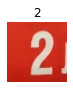

In [0]:
print(tensor)

predict=model.predict(tensor)

print(predict)

predicted_length=np.argmax(predict[0], axis=-1)
predicted_digit1=np.argmax(predict[1], axis=-1)
predicted_digit2=np.argmax(predict[2], axis=-1)
predicted_digit3=np.argmax(predict[3], axis=-1)
predicted_digit4=np.argmax(predict[4], axis=-1)
predicted_digit5=np.argmax(predict[5], axis=-1)

predicted_label=[predicted_length,predicted_digit1,predicted_digit2,predicted_digit3,predicted_digit4,predicted_digit5]

print(predicted_label)

show_images_with_labels(tensor, predicted_label, 1)

# **Part 4: Export model to tensorflow lite**

Convert model to tensorflow lite, in order to use it on weak devices:

In [0]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file('model.h5') 
tfmodel = converter.convert() 
open("model.tflite", "wb").write(tfmodel)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 64 variables.
INFO:tensorflow:Converted 64 variables to const ops.


84766588

Upload original model to google-drive:

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'model-new-processing-best-val-after-80.h5'})
uploaded.SetContentFile('model-80.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1GMySk9ObloNzm0xKaMTO57LyMsz8xb_r


Export to TensorFlowJS:

In [0]:
!pip install tensorflowjs==1.2.6

     |████████████████████████████████| 81kB 4.6MB/s 
     |████████████████████████████████| 109.2MB 49kB/s 
     |████████████████████████████████| 317kB 40.3MB/s 
     |████████████████████████████████| 17.3MB 251kB/s 
     |████████████████████████████████| 491kB 51.8MB/s 
     |████████████████████████████████| 3.2MB 53.2MB/s 
ERROR: tensorflow-model-optimization 0.2.1 requires enum34~=1.1, which is not installed.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 1.14.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.12.0, but you'll have six 1.11.0 which is incompatible.
ERROR: dm-tree 0.1.2 has requirement six>=1.12.0, but you'll have six 1.11.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatib

In [0]:
!mkdir /tmp/tfjs_model

In [0]:
import os
import keras
from keras.models import load_model
import tensorflow as tf

Using TensorFlow backend.


In [0]:
import tensorflowjs as tfjs

ModuleNotFoundError: ignored

In [0]:
tf.compat.v1.disable_eager_execution()
model=load_model('/content/model.h5')# path to model

In [0]:
!cp 'drive/My Drive/model-new-processing-best-val-after-60.h5' model.h5

In [0]:
!tensorflowjs_converter --input_format keras --weight_shard_size_bytes 20000000 model.h5 model/

In [0]:
%ls model

group1-shard1of1.bin  model.json


In [0]:
!tensorflowjs_converter --help

usage: TensorFlow.js model converters. [-h]
                                       [--input_format {keras_saved_model,tf_saved_model,tf_frozen_model,tfjs_layers_model,tf_hub,keras}]
                                       [--output_format {keras_saved_model,tfjs_graph_model,tfjs_layers_model,keras}]
                                       [--signature_name SIGNATURE_NAME]
                                       [--saved_model_tags SAVED_MODEL_TAGS]
                                       [--quantization_bytes {1,2}]
                                       [--split_weights_by_layer] [--version]
                                       [--skip_op_check]
                                       [--strip_debug_ops STRIP_DEBUG_OPS]
                                       [--weight_shard_size_bytes WEIGHT_SHARD_SIZE_BYTES]
                                       [--output_node_names OUTPUT_NODE_NAMES]
                                       [input_path] [output_path]

positional arguments:
  input_path 

In [0]:
!rm -rf model
!rm model.zip

In [0]:
!zip -r model.zip model 

  adding: model/ (stored 0%)
  adding: model/group1-shard1of1.bin (deflated 7%)
  adding: model/model.json (deflated 92%)


In [0]:
from google.colab import files
files.download('model.zip')

# **Afterward. Test result**

Write here about my results. Attach various screenshots.

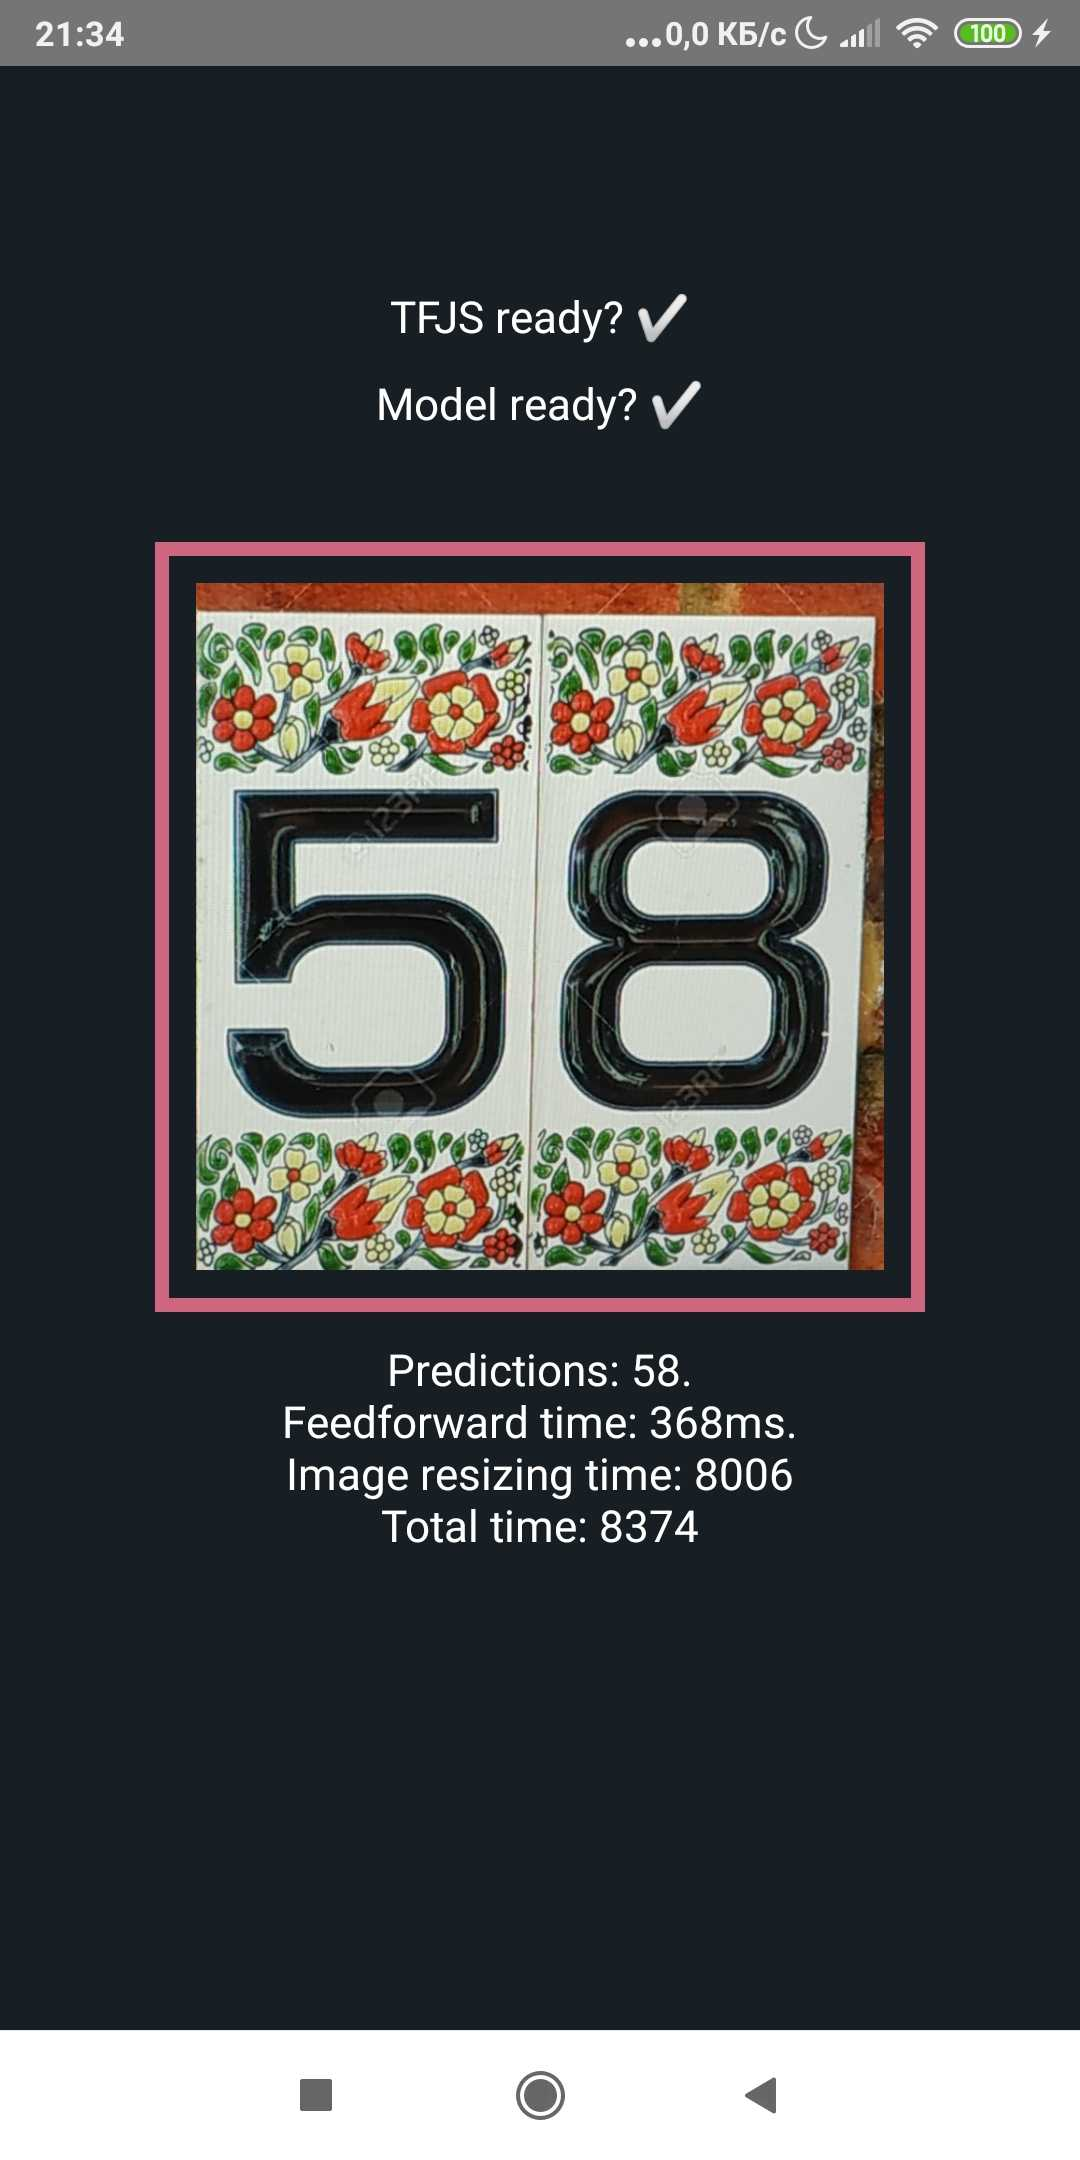

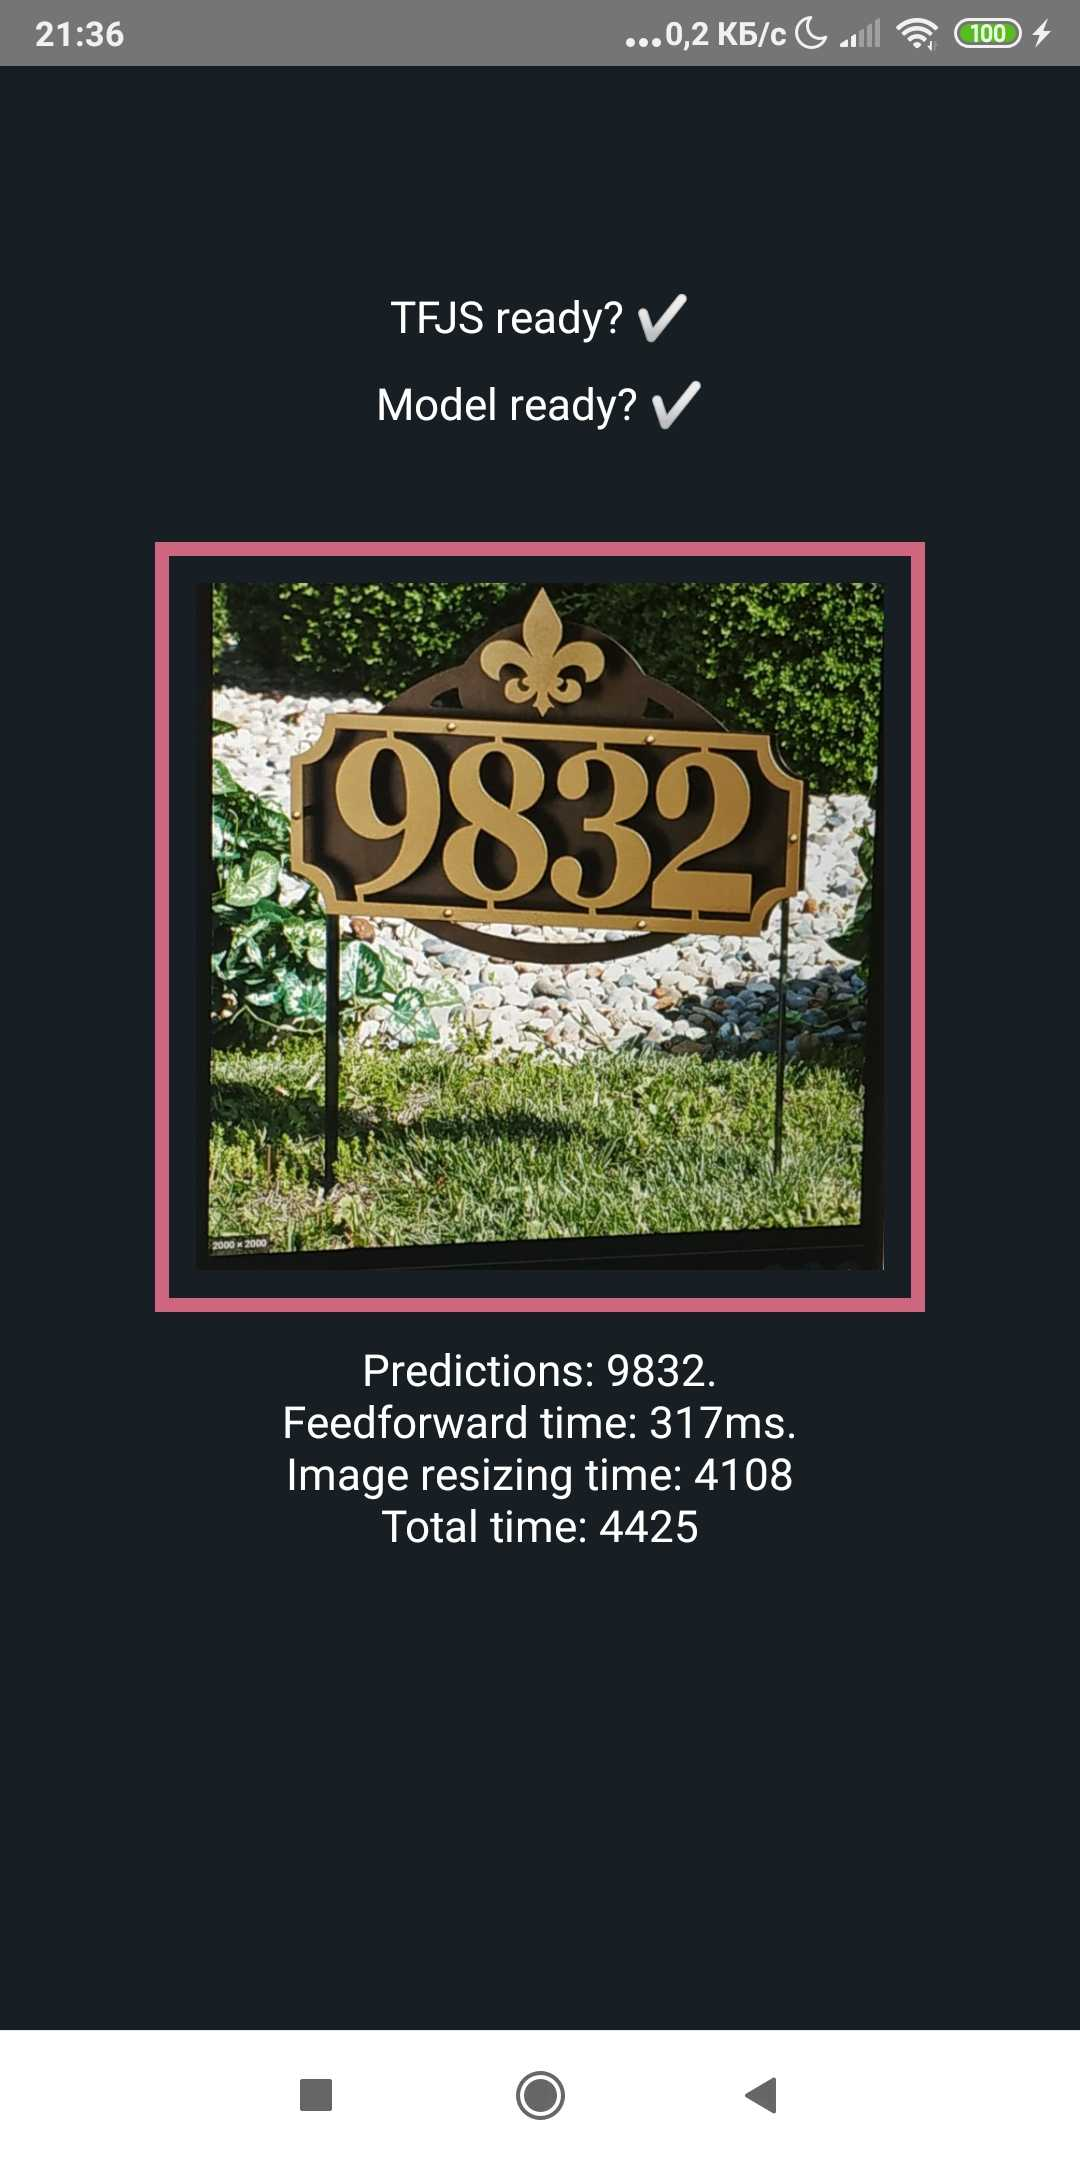

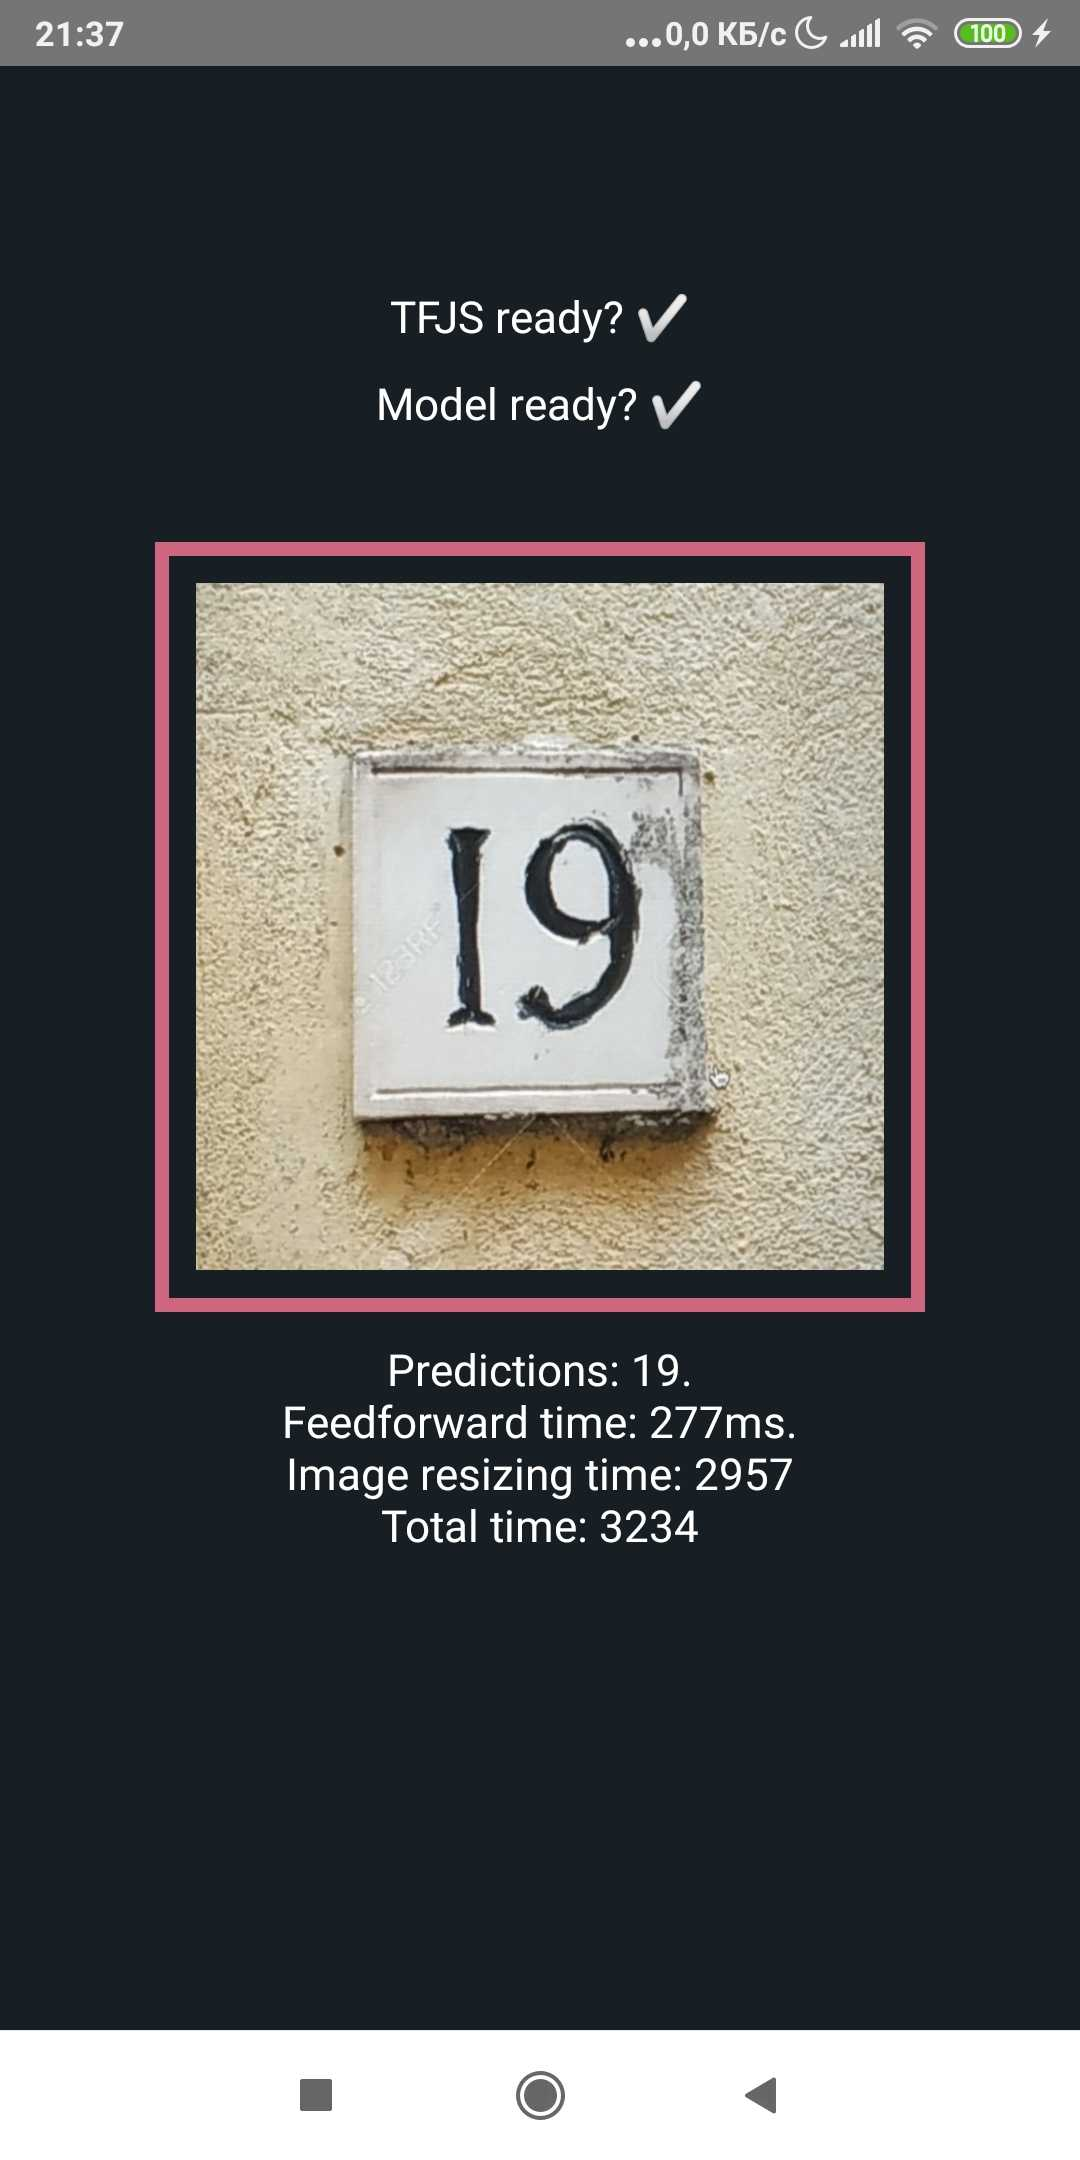

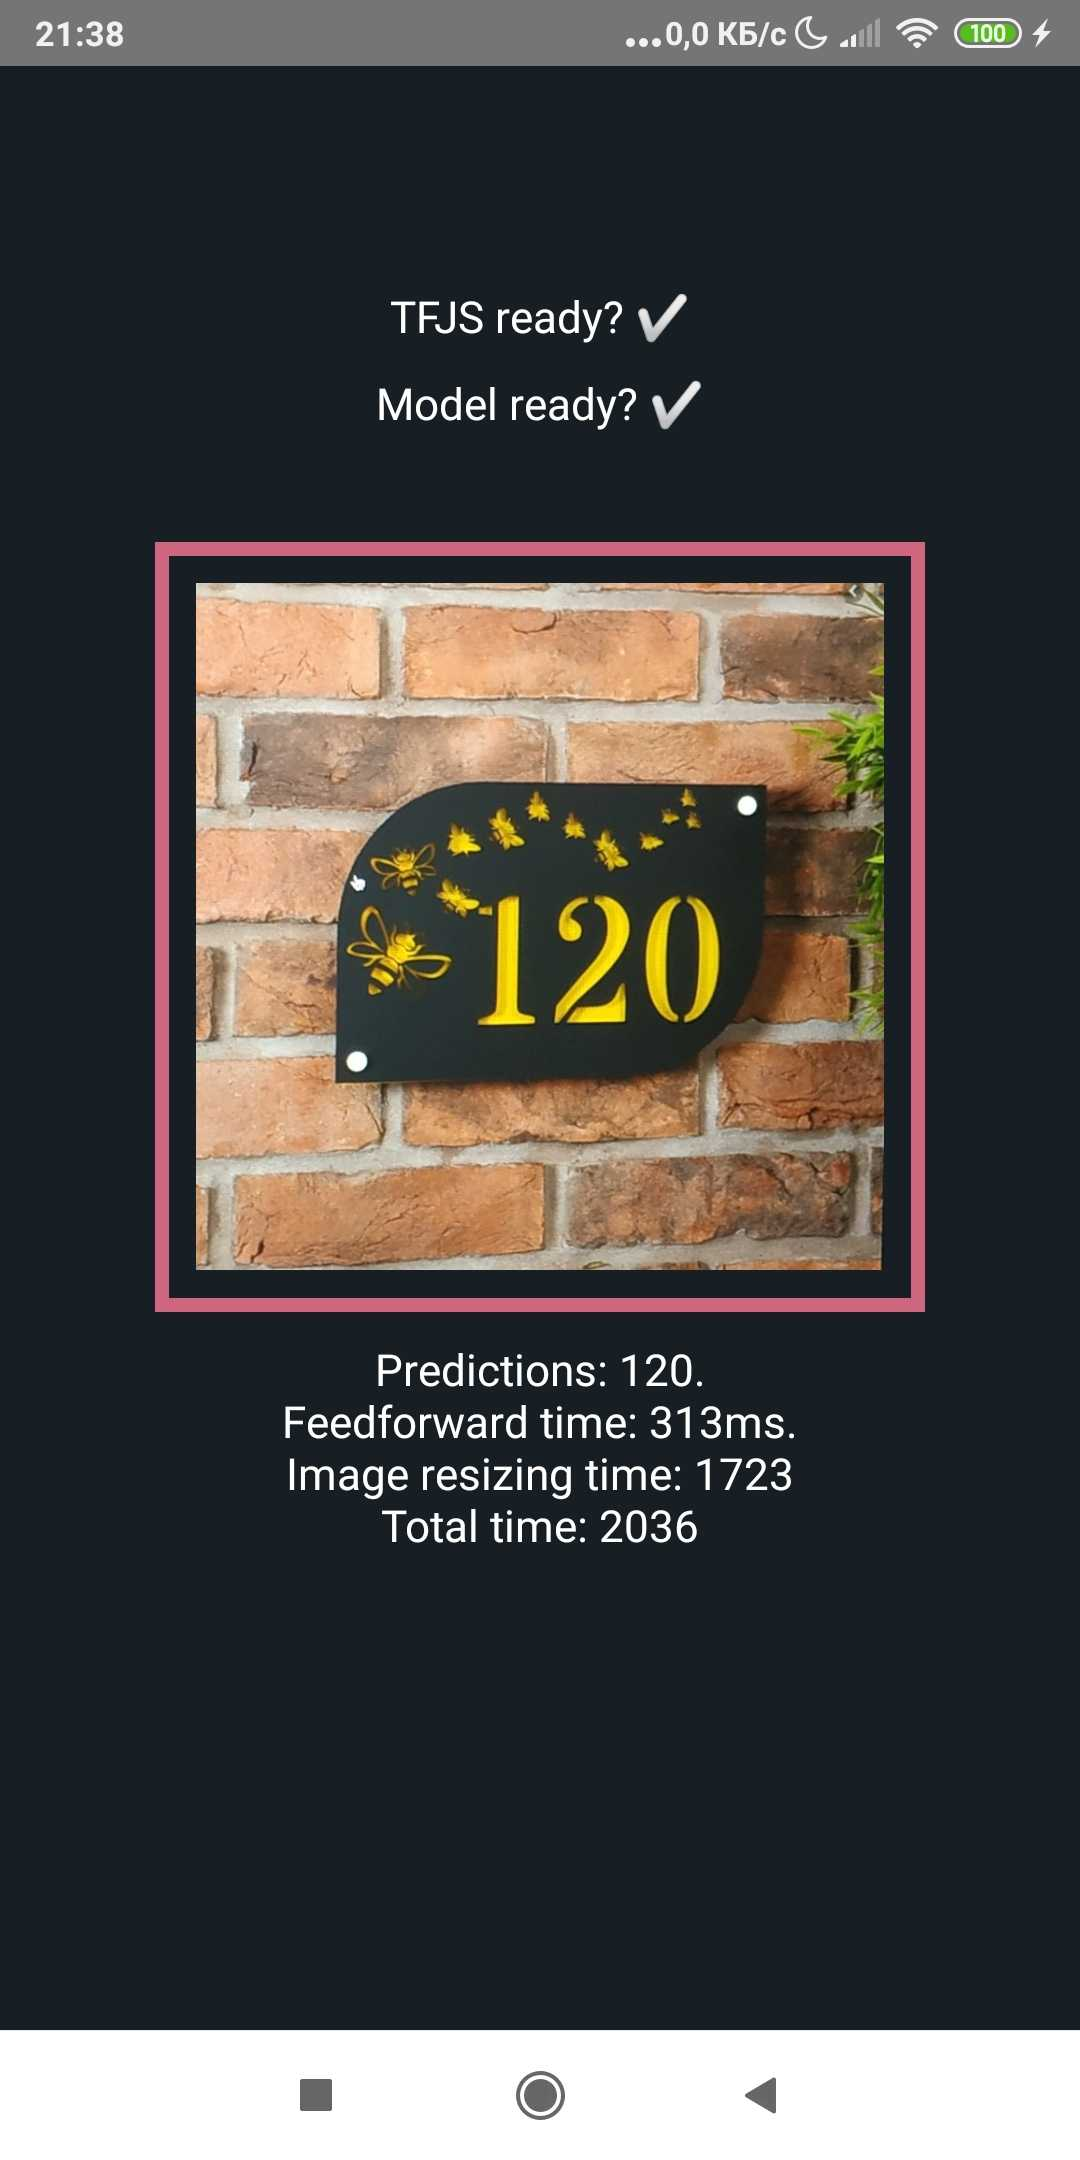

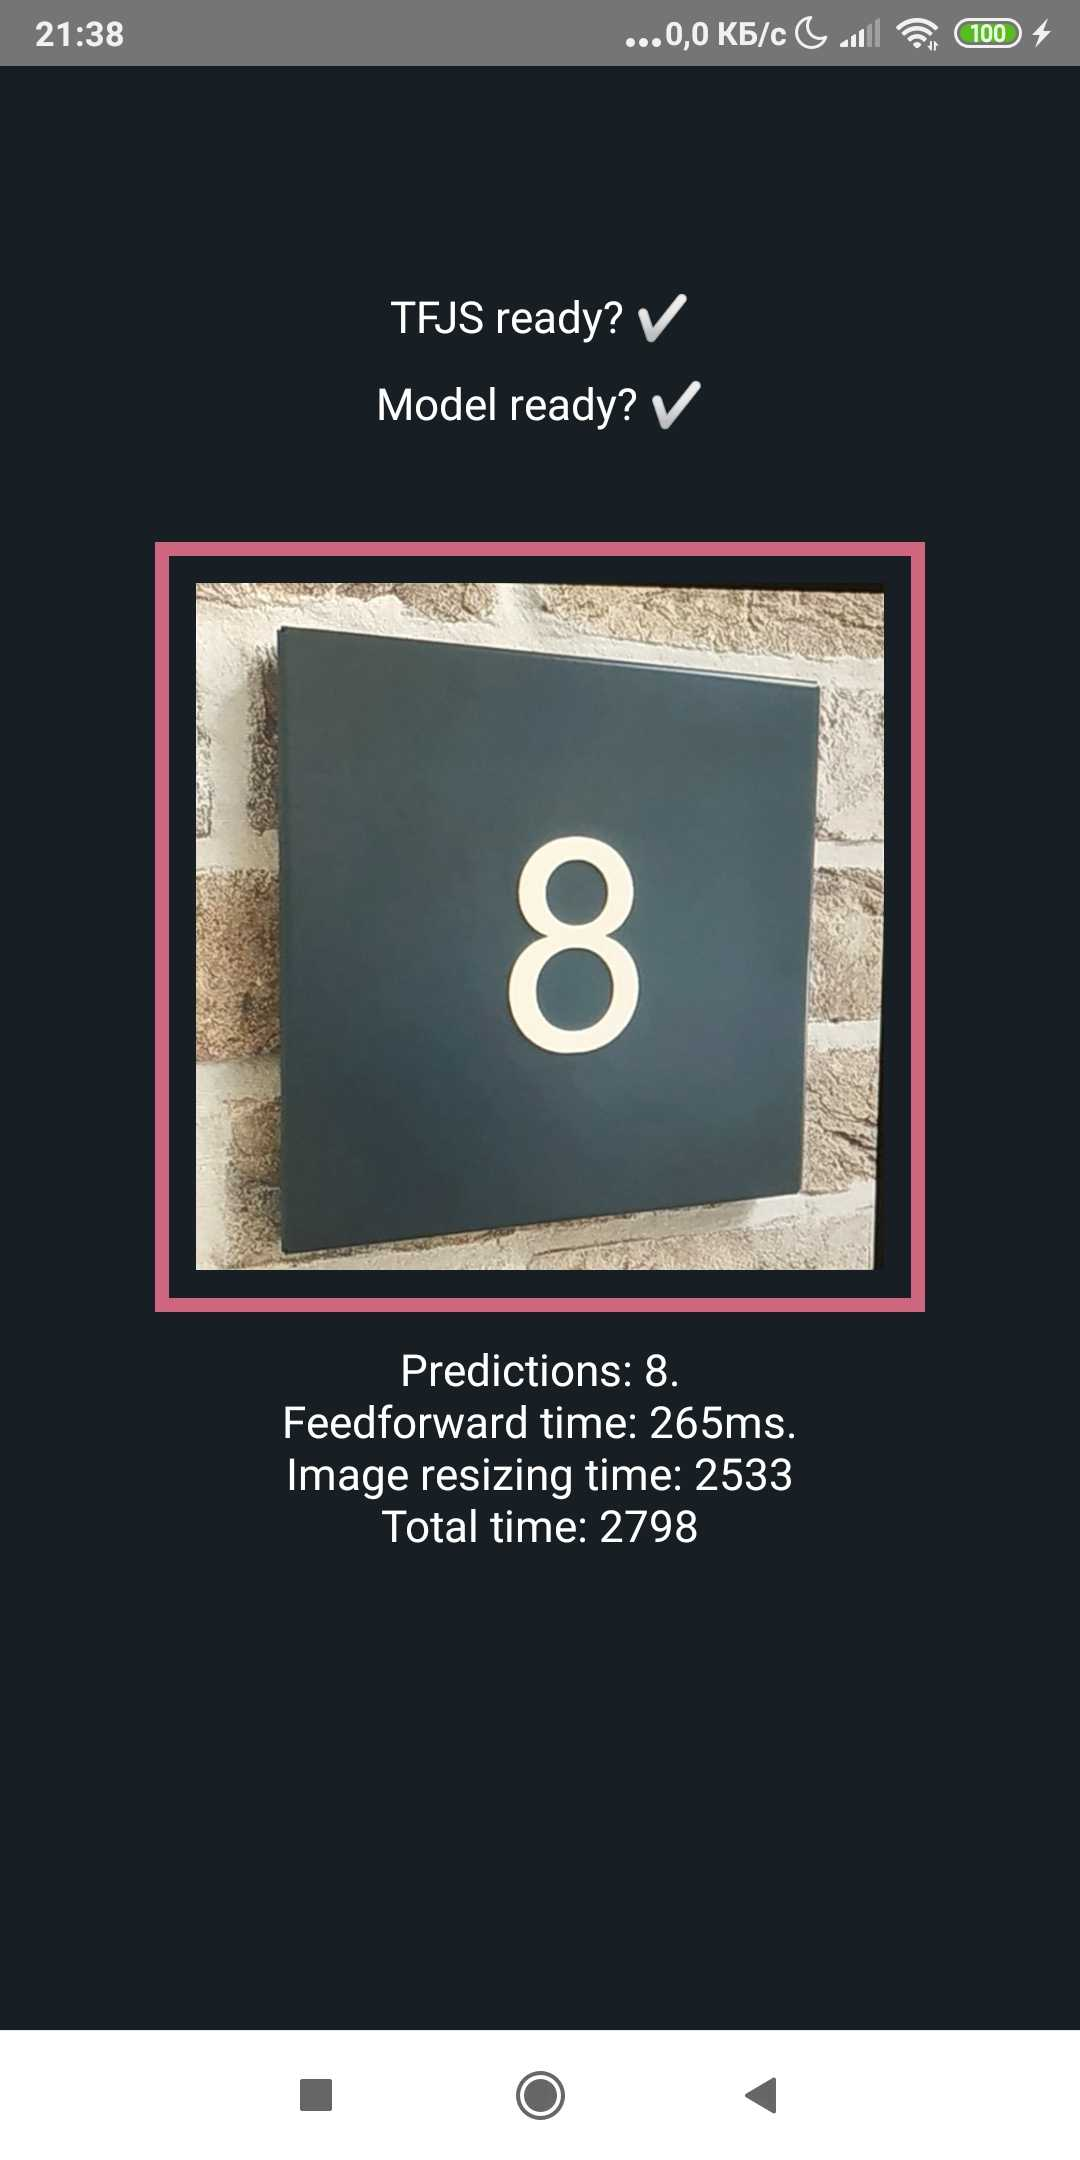

# **Resources**

- Publication from youtube link: https://arxiv.org/abs/1312.6082
- https://github.com/penny4860/Yolo-digit-detector
- https://github.com/dyckia/SVHN-CNN/blob/master/SVHN.ipynb